In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Check the version

In [3]:
print("Pandas Version : {}".format(pd.__version__))
print("Numpy  Version : {}".format(np.__version__))
print("Seaborn Version : {}".format(sns.__version__))
print("Matplotlib Version : {}".format(matplotlib.__version__))

Pandas Version : 1.3.4
Numpy  Version : 1.20.3
Seaborn Version : 0.11.2
Matplotlib Version : 3.4.3


In [4]:
# Import the Loan data csv to DataFrame

In [5]:
loan_df = pd.read_csv('loan.csv')

In [6]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Check the Shape of the DataFrame

In [7]:
loan_df.shape

(39717, 111)

## Import the Data Dcitonary Excel

In [8]:
data_dict = pd.read_excel('Data_Dictionary.xlsx')

## Print the df

In [9]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


## check shape


In [10]:
data_dict.shape

(117, 2)

## Drop the last 3 columns as it is the legend for the emp_title 

In [11]:
data_dict.dropna(inplace=True)

In [12]:
print("Number of column after dropping the NaN are : {}".format(data_dict.shape))

Number of column after dropping the NaN are : (115, 2)


In [13]:
data_dict.tail()

,LoanStatNew,Description
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...


## Change the Index to the "LoanStatnew"

In [14]:
data_dict.set_index('LoanStatNew',drop=True,inplace=True)

In [15]:
data_dict

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...
...,...
total_rev_hi_lim,Total revolving high credit/credit limit
url,URL for the LC page with listing data.
verification_status,"Indicates if income was verified by LC, not ve..."


## View the discription of each column easily using the iloc

In [16]:
data_dict.loc['emp_title'][0]

'The job title supplied by the Borrower when applying for the loan.*'

## cleaned the Legends and the Nan Column 

In [17]:
data_dict['Description'] = data_dict['Description'].apply(lambda x: x.replace('*',''))

In [18]:
data_dict.loc['emp_title'][0]

'The job title supplied by the Borrower when applying for the loan.'

## Check the Column names 

In [19]:
print( "Columns are : \n\n{}".format(','.join(loan_df.columns.to_list() ) ))

Columns are : 

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,b

## Check the dat type of the Dataframe

In [20]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Check if it has null values 

In [21]:
loan_df.isnull().sum() 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [22]:
len(loan_df.columns[loan_df.isnull().sum() > 0].tolist())

68

In [23]:
column_wise_null = loan_df.columns[loan_df.isnull().any()].tolist()
print("The colums that has the null value in columns : \n\n\n{}".format(';'.join(column_wise_null)))

The colums that has the null value in columns : 


emp_title;emp_length;desc;title;mths_since_last_delinq;mths_since_last_record;revol_util;last_pymnt_d;next_pymnt_d;last_credit_pull_d;collections_12_mths_ex_med;mths_since_last_major_derog;annual_inc_joint;dti_joint;verification_status_joint;tot_coll_amt;tot_cur_bal;open_acc_6m;open_il_6m;open_il_12m;open_il_24m;mths_since_rcnt_il;total_bal_il;il_util;open_rv_12m;open_rv_24m;max_bal_bc;all_util;total_rev_hi_lim;inq_fi;total_cu_tl;inq_last_12m;acc_open_past_24mths;avg_cur_bal;bc_open_to_buy;bc_util;chargeoff_within_12_mths;mo_sin_old_il_acct;mo_sin_old_rev_tl_op;mo_sin_rcnt_rev_tl_op;mo_sin_rcnt_tl;mort_acc;mths_since_recent_bc;mths_since_recent_bc_dlq;mths_since_recent_inq;mths_since_recent_revol_delinq;num_accts_ever_120_pd;num_actv_bc_tl;num_actv_rev_tl;num_bc_sats;num_bc_tl;num_il_tl;num_op_rev_tl;num_rev_accts;num_rev_tl_bal_gt_0;num_sats;num_tl_120dpd_2m;num_tl_30dpd;num_tl_90g_dpd_24m;num_tl_op_past_12m;pct_tl_nvr_dlq;percent_bc_

## Check on the row wise if we have null values 

In [24]:
loan_df.isnull().sum(axis=1).shape

(39717,)

In [25]:
loan_df.shape
#  Ideally  means that all rows has a NAN 

(39717, 111)

In [26]:
print("Total Rows in the columns :{}".format(len(loan_df)))
# check if any of the columns has the same length of the dataframe so that we can drop it 
loan_df.columns[loan_df.apply(lambda x: x.isnull().sum() == len(loan_df))]

Total Rows in the columns :39717


Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [27]:
#Assign the Coloumn just has the NaN value to a list 
drop_columns_nan = loan_df.columns[loan_df.apply(lambda x: x.isnull().sum() == len(loan_df))]

In [28]:
len(drop_columns_nan)
#so 54 columns can be dropped as it is useless data 

54

In [29]:
loan_df.drop(columns=drop_columns_nan).shape

(39717, 57)

In [30]:
loan_df.shape

(39717, 111)

In [31]:
loan_df.drop(columns=drop_columns_nan,inplace=True)

In [32]:
loan_df.shape

(39717, 57)

In [33]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


## CHECK FOR ANY DUPLICATE VALUES 

In [34]:
loan_df.duplicated().sum()

0

In [35]:
loan_df[loan_df.duplicated()]
# no duplicate record so nothing to worry 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [36]:
# check again for Nan Value 
some_nan_value_columns = loan_df.columns[loan_df.isnull().sum() > 0].tolist()

In [37]:
for column in some_nan_value_columns:
    print("Inspecting Column {}".format(column))
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print(loan_df.groupby(column, dropna=False, as_index=False).size())

Inspecting Column emp_title
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
                               emp_title  size
0                           old palm inc     1
1                 Brocade Communications     1
2                            CenturyLink     1
3        Department of Homeland Security     1
4       Down To Earth Distributors, Inc.     1
...                                  ...   ...
28816              zeno office solutions     1
28817               zion lutheran school     1
28818                  zoll medical corp     1
28819                 zozaya officiating     1
28820                                NaN  2459

[28821 rows x 2 columns]
Inspecting Column emp_length
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
   emp_length  size
0      1 year  3240
1   10+ years  8879
2     2 years  4388
3     3 years  4095
4     4 years  3436
5     5 years  3282
6     6 years  2229
7     7 years  1773
8     8 years  1479
9     9 years  1258
10   < 1 year  4583
11        NaN  1075
Inspecting Column des

In [38]:
some_nan_value_columns

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [230]:
for column in some_nan_value_columns:
    print("{} ==> {}".format(column,data_dict.loc[column][0]))

emp_title ==> The job title supplied by the Borrower when applying for the loan.
emp_length ==> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
desc ==> Loan description provided by the borrower
title ==> The loan title provided by the borrower
mths_since_last_delinq ==> The number of months since the borrower's last delinquency.
mths_since_last_record ==> The number of months since the last public record.
revol_util ==> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
last_pymnt_d ==> Last month payment was received
next_pymnt_d ==> Next scheduled payment date
last_credit_pull_d ==> The most recent month LC pulled credit for this loan
collections_12_mths_ex_med ==> Number of collections in 12 months excluding medical collections
chargeoff_within_12_mths ==> Number of charge-offs within 12 months
pub_rec_bankruptcies ==> Number of 

## Let's explore the emp_title

In [40]:
# Employee Title as you can see many 2459 Rows has Nan Value as per the data dictonary "* Employer Title replaces Employer Name for all loans listed after 9/23/2013" 
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [41]:
loan_df.shape
#

(39717, 57)

##  Let's explore the emp_title emp_length

In [42]:
data_dict.loc['emp_length'][0]

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

In [43]:
loan_df.groupby(['emp_length'],dropna=False,as_index=False).size().set_index('emp_length')

,size
emp_length,
1 year,3240
10+ years,8879
2 years,4388
3 years,4095
4 years,3436
5 years,3282
6 years,2229
7 years,1773
8 years,1479


In [44]:
loan_df['emp_length'] = loan_df['emp_length'].str.replace('years','').str.replace('+','').str.replace('year','')

In [45]:
loan_df.groupby(['emp_length'],dropna=False,as_index=False).size().set_index('emp_length')
        

,size
emp_length,
1,3240
10,8879
2,4388
3,4095
4,3436
5,3282
6,2229
7,1773
8,1479


In [46]:
loan_df['emp_length'].fillna('0',inplace=True)

In [47]:
loan_df.groupby(['emp_length'],dropna=False,as_index=False).size().set_index('emp_length')

,size
emp_length,
0,1075
1,3240
10,8879
2,4388
3,4095
4,3436
5,3282
6,2229
7,1773


In [48]:
loan_df['emp_length'].value_counts()

10      8879
< 1     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
0       1075
Name: emp_length, dtype: int64

In [49]:
loan_df['emp_length'].value_counts().index

Index(['10 ', '< 1 ', '2 ', '3 ', '4 ', '5 ', '1 ', '6 ', '7 ', '8 ', '9 ',
       '0'],
      dtype='object')

In [50]:
loan_df['emp_length'] = loan_df['emp_length'].str.replace('< 1 ',"0")

In [51]:
loan_df['emp_length'].value_counts()


10     8879
0      5658
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: emp_length, dtype: int64

In [52]:
loan_df['emp_length'].dtype

dtype('O')

In [53]:
loan_df.groupby(['emp_length'],dropna=False,as_index=False).size().set_index('emp_length')
#loan_df.astype({ 'emp_length' :'int32'})

,size
emp_length,
0,5658
1,3240
10,8879
2,4388
3,4095
4,3436
5,3282
6,2229
7,1773


In [54]:
loan_df['emp_length'] = loan_df['emp_length'].astype('int')

In [55]:
loan_df['emp_length'].dtype
# so we have converted this to  match the description in the data dictionary and also converted to int value 

dtype('int64')

## Explore desc

In [56]:
loan_df['desc'].isnull().sum()
#12940/39717*100 32% data is null sodropping this 

12940

In [57]:
loan_df.drop(columns=['desc'],inplace=True)

In [58]:
loan_df.shape

(39717, 56)

## let's explore title

In [59]:
loan_df.groupby('title',as_index=False,dropna=False).size()

,title,size
0,\tdebt_consolidation,2
1,HITEK EQUIPMENT,1
2,APRILIA TUONO 1000R,1
3,Auto,1
4,Auto Loan,1
...,...,...
19611,zandercade,1
19612,zipcar,1
19613,zxcvb,1
19614,îîMY FIRST CAR îî,1


In [60]:
loan_df['title'].isnull().sum()

11

In [61]:
loan_df.drop(columns=['title'],inplace=True)

In [62]:
loan_df.shape

(39717, 55)

## let's explore mths_since_last_delinq
Delinquency means that you are behind on payments. Once you are delinquent for a certain period of time (usually nine months for federal loans), your lender will declare the loan to be in default. The entire loan balance will become due at that time.

When you default on a loan, your account is sent to a debt collection agency that tries to recover your outstanding payments. Defaulting on any payment will reduce your credit score, impair your ability to borrow money in the future, will lead to fees, and possibly result in the seizure of your personal property

In [63]:
data_dict.loc['mths_since_last_delinq'][0]

"The number of months since the borrower's last delinquency."

In [64]:
loan_df.groupby('mths_since_last_delinq',as_index=False,dropna=False).size()

,mths_since_last_delinq,size
0,0.0,443
1,1.0,30
2,2.0,101
3,3.0,145
4,4.0,153
...,...,...
91,106.0,1
92,107.0,1
93,115.0,1
94,120.0,1


In [65]:
loan_df.drop(columns=['mths_since_last_delinq'],inplace=True)
# 25682 has nan value 64% is not having value

In [66]:
loan_df.shape

(39717, 54)

## let's explore mths_since_last_record

In [67]:
data_dict.loc['mths_since_last_record'][0]

'The number of months since the last public record.'

In [68]:
loan_df.groupby('mths_since_last_record',as_index=False,dropna=False).size().set_index('mths_since_last_record')

,size
mths_since_last_record,
0.0,670
5.0,1
6.0,1
7.0,1
11.0,2
...,...
118.0,36
119.0,10
120.0,1


In [69]:
loan_df.drop(columns=['mths_since_last_record'],inplace=True)
#36931 (92% ) value is nan so drop it 

In [70]:
loan_df.shape

(39717, 53)

## let's explore revol_util

In [71]:
data_dict.loc['revol_util']

Description    Revolving line utilization rate, or the amount...
Name: revol_util, dtype: object

In [72]:
loan_df.groupby('revol_util',as_index=False,dropna=False).size().set_index('revol_util')

,size
revol_util,
0%,977
0.01%,1
0.03%,1
0.04%,1
0.05%,1
...,...
99.60%,24
99.70%,31
99.80%,23


## let's explore revol_util

In [73]:
loan_df.groupby('last_pymnt_d',as_index='last_pymnt_d',dropna=False).size().reset_index()

,last_pymnt_d,0
0,Apr-08,12
1,Apr-09,43
2,Apr-10,114
3,Apr-11,420
4,Apr-12,734
...,...,...
97,Sep-12,761
98,Sep-13,684
99,Sep-14,693
100,Sep-15,202


## Let's explore 'next_pymnt_d'

In [74]:
loan_df.groupby('next_pymnt_d',as_index=False,dropna=False).size().set_index('next_pymnt_d')

,size
next_pymnt_d,
Jul-16,15
Jun-16,1125
NaN,38577


In [75]:
loan_df.drop(columns=['next_pymnt_d'],inplace=True)
#97% nan value 

In [76]:
loan_df.shape

(39717, 52)

In [77]:
## Let's explore  Columns
 #ast_credit_pull_d,
 #collections_12_mths_ex_med,
 #chargeoff_within_12_mths,
 #pub_rec_bankruptcies,
 #tax_liens

In [78]:
loan_df.groupby('last_credit_pull_d',as_index=False,dropna=False).size().set_index('last_credit_pull_d')

,size
last_credit_pull_d,
Apr-09,15
Apr-10,60
Apr-11,135
Apr-12,308
Apr-13,425
...,...
Sep-12,391
Sep-13,390
Sep-14,546


In [79]:
loan_df.groupby('collections_12_mths_ex_med',as_index=False,dropna=False).size().set_index('collections_12_mths_ex_med')

,size
collections_12_mths_ex_med,
0.0,39661
NaN,56


In [80]:
loan_df.groupby('pub_rec_bankruptcies',as_index=False,dropna=False).size().set_index('pub_rec_bankruptcies')

,size
pub_rec_bankruptcies,
0.0,37339
1.0,1674
2.0,7
NaN,697


In [81]:
loan_df.groupby('tax_liens',as_index=False,dropna=False).size().set_index('tax_liens')

,size
tax_liens,
0.0,39678
NaN,39


## Most of them are 0.0  for collections_12_mths_ex_med/collections_12_mths_ex_med/pub_rec_bankruptcies/tax_liens

In [82]:
loan_df.drop(columns=['collections_12_mths_ex_med','collections_12_mths_ex_med','pub_rec_bankruptcies','tax_liens'],inplace=True)

In [83]:
loan_df.shape

(39717, 49)

In [84]:
for column in loan_df.columns.tolist():
    print("{} ===> {}".format(column,data_dict.loc[column][0]))

id ===> A unique LC assigned ID for the loan listing.
member_id ===> A unique LC assigned Id for the borrower member.
loan_amnt ===> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt ===> The total amount committed to that loan at that point in time.
funded_amnt_inv ===> The total amount committed by investors for that loan at that point in time.
term ===> The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate ===> Interest Rate on the loan
installment ===> The monthly payment owed by the borrower if the loan originates.
grade ===> LC assigned loan grade
sub_grade ===> LC assigned loan subgrade
emp_title ===> The job title supplied by the Borrower when applying for the loan.
emp_length ===> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more yea

In [85]:
loan_df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [86]:
loan_df['int_rate']


0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [87]:
loan_df['int_rate'].dtype

dtype('O')

In [88]:
# convert this to Numerical

In [89]:
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','')

In [90]:
loan_df['int_rate'].astype('float')

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [91]:
loan_df['int_rate']  = loan_df['int_rate'].astype('float')

In [92]:
loan_df['int_rate'].dtype

dtype('float64')

In [93]:
loan_df['installment']

0        162.87
1         59.83
2         84.33
3        339.31
4         67.79
          ...  
39712     78.42
39713    275.38
39714    156.84
39715    155.38
39716    255.43
Name: installment, Length: 39717, dtype: float64

In [94]:
loan_df['installment'].value_counts()

311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: installment, Length: 15383, dtype: int64

In [95]:
loan_df['grade'].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [96]:

loan_df['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [97]:
# Just assign the value OTHER as we expect only RENT/MORTGAGE/OWN/OTHER 
loan_df.loc[loan_df['home_ownership'] == 'NONE' , 'home_ownership'] = 'OTHER'

In [98]:

loan_df['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

In [99]:
loan_df['annual_inc'].value_counts()

60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: annual_inc, Length: 5318, dtype: int64

In [100]:
loan_df['annual_inc'].dtype

dtype('float64')

In [101]:
loan_df['verification_status'].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [102]:
loan_df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [103]:
###loan_df.rename(columns={'issue_d' : 'issued'},inplace=True)

In [104]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt'],
      dtype='object')

In [105]:
loan_df['issue_yr'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y').dt.year

In [106]:
len(loan_df.columns)

50

In [107]:
loan_df['issue_mnt'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y').dt.month_name()

In [108]:
len(loan_df.columns)

51

In [109]:
loan_df[['issue_d','issue_mnt','issue_yr']]

,issue_d,issue_mnt,issue_yr
0,Dec-11,December,2011
1,Dec-11,December,2011
2,Dec-11,December,2011
3,Dec-11,December,2011
4,Dec-11,December,2011
...,...,...,...
39712,Jul-07,July,2007
39713,Jul-07,July,2007
39714,Jul-07,July,2007
39715,Jul-07,July,2007


In [110]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [111]:
loan_df['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [112]:
loan_df.drop(columns=['pymnt_plan'],inplace=True)
# Not neededas just "n" is the value 

In [113]:
loan_df.shape

(39717, 50)

In [114]:
loan_df['url'][0]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077501'

In [115]:
# nothing use fule as theonly one we can derive is the id which is already there 
loan_df.drop(columns=['url'],inplace=True)

In [116]:
loan_df.shape

(39717, 49)

In [117]:
loan_df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [118]:
loan_df['zip_code'].value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

In [119]:
loan_df['addr_state'].value_counts().sum()

39717

In [120]:
loan_df['delinq_2yrs'].value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [121]:
loan_df['earliest_cr_line'].value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [122]:
loan_df['inq_last_6mths'].value_counts()

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

In [123]:
loan_df['inq_last_6mths'].dtype

dtype('int64')

In [124]:
loan_df['open_acc'].value_counts()

7     4018
6     3946
8     3936
9     3718
10    3223
5     3183
11    2746
4     2343
12    2273
13    1911
3     1493
14    1487
15    1177
16     940
17     741
2      605
18     533
19     396
20     289
21     244
22     143
23      97
24      81
25      55
26      34
28      25
27      22
30      15
29      13
31       7
34       5
32       4
35       4
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: open_acc, dtype: int64

In [125]:
loan_df['open_acc'].dtype

dtype('int64')

In [126]:
loan_df['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [127]:
loan_df['revol_bal'].value_counts()

0        994
298       14
255       14
1         12
682       11
        ... 
21424      1
30747      1
23862      1
20197      1
85607      1
Name: revol_bal, Length: 21711, dtype: int64

In [128]:
loan_df['revol_bal'].dtype

dtype('int64')

In [129]:
loan_df['total_acc'].value_counts()

16    1471
15    1462
17    1457
14    1445
20    1428
      ... 
74       1
77       1
78       1
87       1
90       1
Name: total_acc, Length: 82, dtype: int64

In [130]:
loan_df['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [131]:
#drop it as per data_dict the possible values are only  – W, F

loan_df.drop(columns='initial_list_status',inplace=True)

In [132]:
loan_df.shape

(39717, 48)

In [133]:
loan_df['out_prncp'].value_counts()

0.00       38577
1972.60        2
827.13         2
2277.11        2
2963.24        2
           ...  
782.23         1
2296.41        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp, Length: 1137, dtype: int64

In [134]:
loan_df['out_prncp_inv'].value_counts()

0.00       38577
1972.60        2
1664.64        2
827.13         2
1863.21        1
           ...  
782.23         1
2289.14        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp_inv, Length: 1138, dtype: int64

In [135]:
loan_df['total_pymnt'].dtype

dtype('float64')

In [136]:
loan_df['total_pymnt'] = loan_df['total_pymnt'].round(2)
#just round the value to 2 as it is not constant 

In [137]:
loan_df['total_pymnt'].value_counts()

11196.57    26
6514.52     19
10956.78    17
13148.14    17
0.00        16
            ..
1405.60      1
10938.38     1
7651.41      1
4514.49      1
9195.26      1
Name: total_pymnt, Length: 36591, dtype: int64

In [138]:
loan_df['total_pymnt_inv']

0         5833.84
1         1008.71
2         3005.67
3        12231.89
4         3513.33
           ...   
39712     1213.88
39713     1020.51
39714     1397.12
39715      672.66
39716      980.83
Name: total_pymnt_inv, Length: 39717, dtype: float64

In [139]:
loan_df['total_pymnt_inv'].value_counts()

0.00        165
6514.52      16
5478.39      14
13148.14     14
11196.57     12
           ... 
17702.50      1
19026.06      1
7355.24       1
387.55        1
980.83        1
Name: total_pymnt_inv, Length: 37518, dtype: int64

In [140]:
loan_df['total_rec_prncp'].value_counts()

10000.00    2293
12000.00    1805
5000.00     1702
6000.00     1637
15000.00    1400
            ... 
1097.81        1
1410.30        1
6968.65        1
3477.49        1
16077.42       1
Name: total_rec_prncp, Length: 7976, dtype: int64

In [141]:
loan_df['total_rec_int'].value_counts()

0.00       71
1196.57    26
514.52     19
956.78     17
1784.23    17
           ..
494.53      1
1119.88     1
62.31       1
2656.10     1
1695.26     1
Name: total_rec_int, Length: 35148, dtype: int64

In [142]:
loan_df['total_rec_late_fee'].value_counts()

0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: total_rec_late_fee, Length: 1356, dtype: int64

In [143]:
#just roujd to 2 decimal

loan_df['total_rec_late_fee'] = loan_df['total_rec_late_fee'].round(2)

In [144]:
loan_df['total_rec_late_fee'].value_counts()

0.00     37671
15.00      604
30.00      123
14.98       68
14.99       53
         ...  
24.33        1
67.61        1
34.18        1
17.81        1
19.89        1
Name: total_rec_late_fee, Length: 801, dtype: int64

In [145]:
loan_df['recoveries'].value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

In [146]:
loan_df['collection_recovery_fee'].value_counts()

0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: collection_recovery_fee, Length: 2616, dtype: int64

In [147]:
loan_df['last_pymnt_d'].value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [148]:
loan_df['last_credit_pull_d'].value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [149]:
loan_df['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [150]:
loan_df.drop(columns = ['policy_code'],inplace=True)

In [151]:
loan_df.shape

(39717, 47)

In [152]:
loan_df['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [153]:
loan_df.drop(columns = ['application_type'],inplace=True)

In [154]:
loan_df.shape

(39717, 46)

In [155]:
loan_df['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [156]:
loan_df.drop(columns = ['acc_now_delinq'],inplace=True)

In [157]:
loan_df.shape

(39717, 45)

In [158]:
loan_df['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [159]:
loan_df.drop(columns = ['chargeoff_within_12_mths'],inplace=True)

In [160]:
loan_df.shape

(39717, 44)

In [161]:
loan_df['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [162]:
loan_df.drop(columns = ['delinq_amnt'],inplace=True)

In [163]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_yr,issue_mnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,2011,December
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,2011,December
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,2011,December
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,2011,December
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,2011,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,2007,July
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,2007,July
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,2007,July
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,2007,July


In [164]:
## Check the Numerical value to find the Describe 

In [165]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.00,837755.00,1077501.00
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.00,1047339.00,1314167.00
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.00,15000.00,35000.00
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.00,15000.00,35000.00
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.00,14400.00,35000.00
int_rate,39717.0,12.021177,3.724825,5.42,9.25,11.86,14.59,24.59
installment,39717.0,324.561922,208.874874,15.69,167.02,280.22,430.78,1305.19
emp_length,39717.0,4.838835,3.605528,0.00,2.00,4.00,9.00,10.00
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.00,82300.00,6000000.00
dti,39717.0,13.315130,6.678594,0.00,8.17,13.40,18.60,29.99


In [166]:
loan_df.drop(columns = ['id','member_id'],inplace=True)

In [167]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.00,15000.00,35000.00
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.00,15000.00,35000.00
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.00,14400.00,35000.00
int_rate,39717.0,12.021177,3.724825,5.42,9.25,11.86,14.59,24.59
installment,39717.0,324.561922,208.874874,15.69,167.02,280.22,430.78,1305.19
emp_length,39717.0,4.838835,3.605528,0.00,2.00,4.00,9.00,10.00
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.00,82300.00,6000000.00
dti,39717.0,13.315130,6.678594,0.00,8.17,13.40,18.60,29.99
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.00,0.00,11.00
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.00,1.00,8.00


In [168]:
# as you can see the "Annual_inc" seems to be having an outlier  as the max 6000000.00 and min and also from IQR   
loan_df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

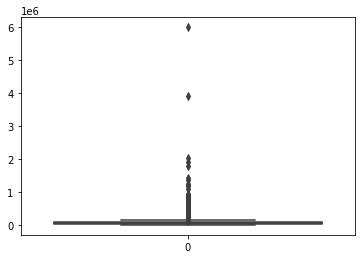

In [169]:
#loan_df['annual_inc'].plot.box()
sns.boxplot(data=loan_df['annual_inc'])

In [170]:
loan_df['annual_inc'].quantile([.90,.95,.97,.99]).tolist()

[116000.0, 142000.0, 165757.9199999984, 234999.36]

In [171]:
for quant in loan_df['annual_inc'].quantile([.90,.95,.97,.99]).tolist():
    print("No rows affected  > {}: {}".format(quant,len(loan_df[loan_df['annual_inc'] > quant])))

No rows affected  > 116000.0: 3946
No rows affected  > 142000.0: 1974
No rows affected  > 165757.9199999984: 1192
No rows affected  > 234999.36: 398


In [172]:
loan_df.shape

(39717, 41)

In [173]:
quant_99 = loan_df['annual_inc'].quantile(.99)
loan_df = loan_df[loan_df['annual_inc'] < quant_99]
loan_df.shape

(39319, 41)

<AxesSubplot:>

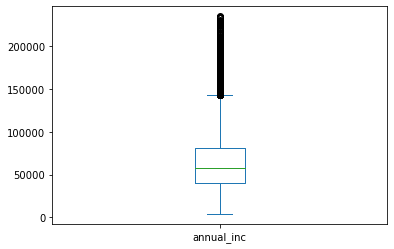

In [174]:
loan_df['annual_inc'].plot.box()

# Univariate 

In [175]:
loan_df['annual_inc'].describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [176]:
for col in loan_df.columns:
    print('\n{} :  {} : {}\n'.format(col,loan_df[col].dtype,loan_df[col].unique()))


loan_amnt :  int64 : [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050 16100
 10525 19775 14500 11700  4150 12375  1700 22250 11200 22500 15900  3150
 18550  8575  7700 24500 2220


pub_rec :  int64 : [0 1 2 3 4]


revol_bal :  int64 : [13648  1687  2956 ... 27185 66033 85607]


revol_util :  object : ['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


total_acc :  int64 : [ 9  4 10 37 38 12 11 13  3 23 34 29 28 42 14 22 21 17  7 31 44 26 16  6
 18 27 24 25 40 35  8 20 15 19 36 51 32 30 33 46  5 61 56 50 41 39 79 62
 43 47 53 45 60 55 52 58 54 57 49 63 48 59 77 87 75 72 64 67 78 76 74 66
 81 90 80 71 69 73 70 68 65  2]


out_prncp :  float64 : [   0.    524.06 1849.1  ...   19.12   13.28   79.24]


out_prncp_inv :  float64 : [   0.    524.06 1844.43 ...   19.09   13.28   79.24]


total_pymnt :  float64 : [5863.16 1008.71 3005.67 ... 5272.16 5174.2  9195.26]


total_pymnt_inv :  float64 : [5833.84 1008.71 3005.67 ... 1397.12  672.66  980.83]


total_rec_prncp :  float64 : [ 5000.     456.46  2400.   ...  2886.21   544.02 16077.42]


total_rec_int :  float64 : [ 863.16  435.17  605.67 ... 1413.49  174.2  1695.26]


total_rec_late_fee :  float64 : [0.0000e+00

## Examine the  Variable 

## Variable category 
### Categorical 
    #### Ordinal  - issue_mnt/issue_yr/last_credit_pull_d/last_pymnt_d/collection_recovery_fee/recoveries
    #### Nominal
### Quantitative data (Numerical)
    #### loan_amnt/funded_amnt/last_pymnt_amnt
 

In [177]:
#As a base line just assume all object are categorical . This assumption can be wrong as well but we get some idea. Excample Issue_yr maybe numerical however it can be categorical 
categorical  = []
quantitative = []
for col in loan_df.columns:
    if loan_df[col].dtypes == 'object':
        categorical.append(col)
    else:
        quantitative.append(col)
print("Categorical Variable are :\n {}\n".format(','.join(categorical)))
print("Quantitative  Varable  are :\n {}\n".format(','.join(quantitative)))

Categorical Variable are :
 term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d,issue_mnt

Quantitative  Varable  are :
 loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,issue_yr



# Categorical  

## Inspect the Charged off ration in total 

[32609, 5584, 1126]


Fully Paid     32609
Charged Off     5584
Current         1126
Name: loan_status, dtype: int64

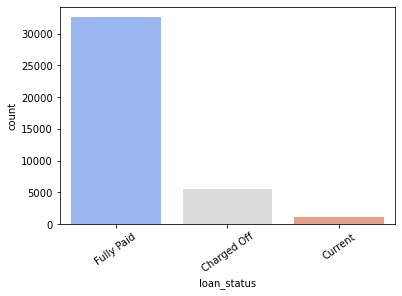

In [178]:
import json 
# As we want to know who willbe default ( charged off we just do a boxplot or countplot of that ). There are people who fully paid most of the time 
plt.xticks(rotation=35)
sns.countplot(data=loan_df, x=loan_df["loan_status"], palette='coolwarm',order=loan_df["loan_status"].value_counts(ascending=False).index)
print(json.dumps(loan_df["loan_status"].value_counts().tolist()))
loan_df['loan_status'].value_counts()

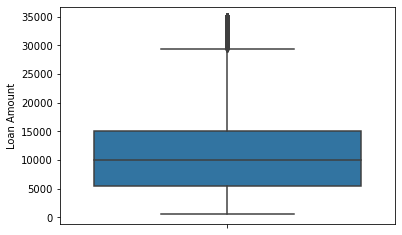

In [179]:
sns.boxplot( y=loan_df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()
# Some outliers are there 

In [180]:
loan_df["home_ownership"].value_counts()
# Since it is < 5 let's try a pie chart ad Bar chart 

RENT        18813
MORTGAGE    17378
OWN          3029
OTHER          99
Name: home_ownership, dtype: int64

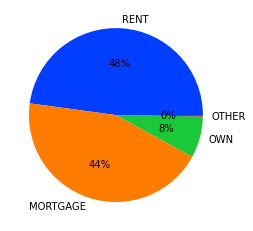

In [181]:
## PieChare
keys = ['RENT', 'MORTGAGE', 'OWN', 'OTHER']
  
# declaring exploding pie
#explode = [0.1, 0.0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(loan_df["home_ownership"].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
#loan_df["home_ownership"].value_counts().plot.pie( autopct='%.0f%%',colors=palette_color)
#displaying chart
plt.show()

## Nominal Categorical Value

### Home_Ownership vs loan satus 

In [182]:
#loan_df.pivot_table(index='loan_status',columns='home_ownership',values='addr_state',aggfunc=len).reset_index()
#sns.catplot(data=loan_df,x='loan_status',y='home_ownership',kind="bar")
loan_df['loan_status']
#order_data = loan_df.loan_status.value_counts(dropna = False).sort_index().index
#print(loan_df.groupby('loan_status')['home_ownership'].value_counts(dropna = False).sort_index())
#sns.countplot(data=loan_df,x='home_ownership',order = order_data)


#            sns.countplot(x = x_axis, order = series.sort_index().index, data = data)
series = loan_df.home_ownership.value_counts()
series
#sns.countplot(x = 'home_ownership', order =series.sort_index().index, data = loan_df)

RENT        18813
MORTGAGE    17378
OWN          3029
OTHER          99
Name: home_ownership, dtype: int64

[18813, 17378, 3029, 99]


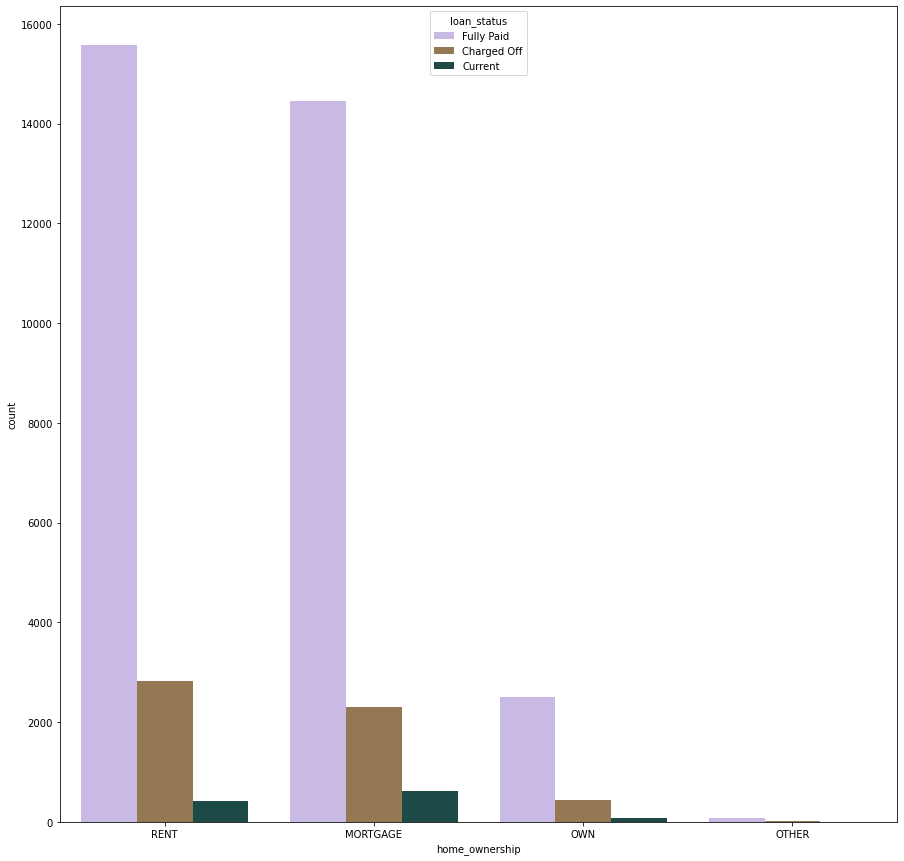

In [183]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(data=loan_df, x=loan_df["home_ownership"], hue='loan_status',palette='cubehelix_r',order=loan_df["home_ownership"].value_counts(ascending=False).index)
print(json.dumps(loan_df["home_ownership"].value_counts().tolist()))

### verification_status vs loan_status  

In [184]:
loan_df['verification_status'].value_counts()

Not Verified       16831
Verified           12625
Source Verified     9863
Name: verification_status, dtype: int64

[16831, 12625, 9863]


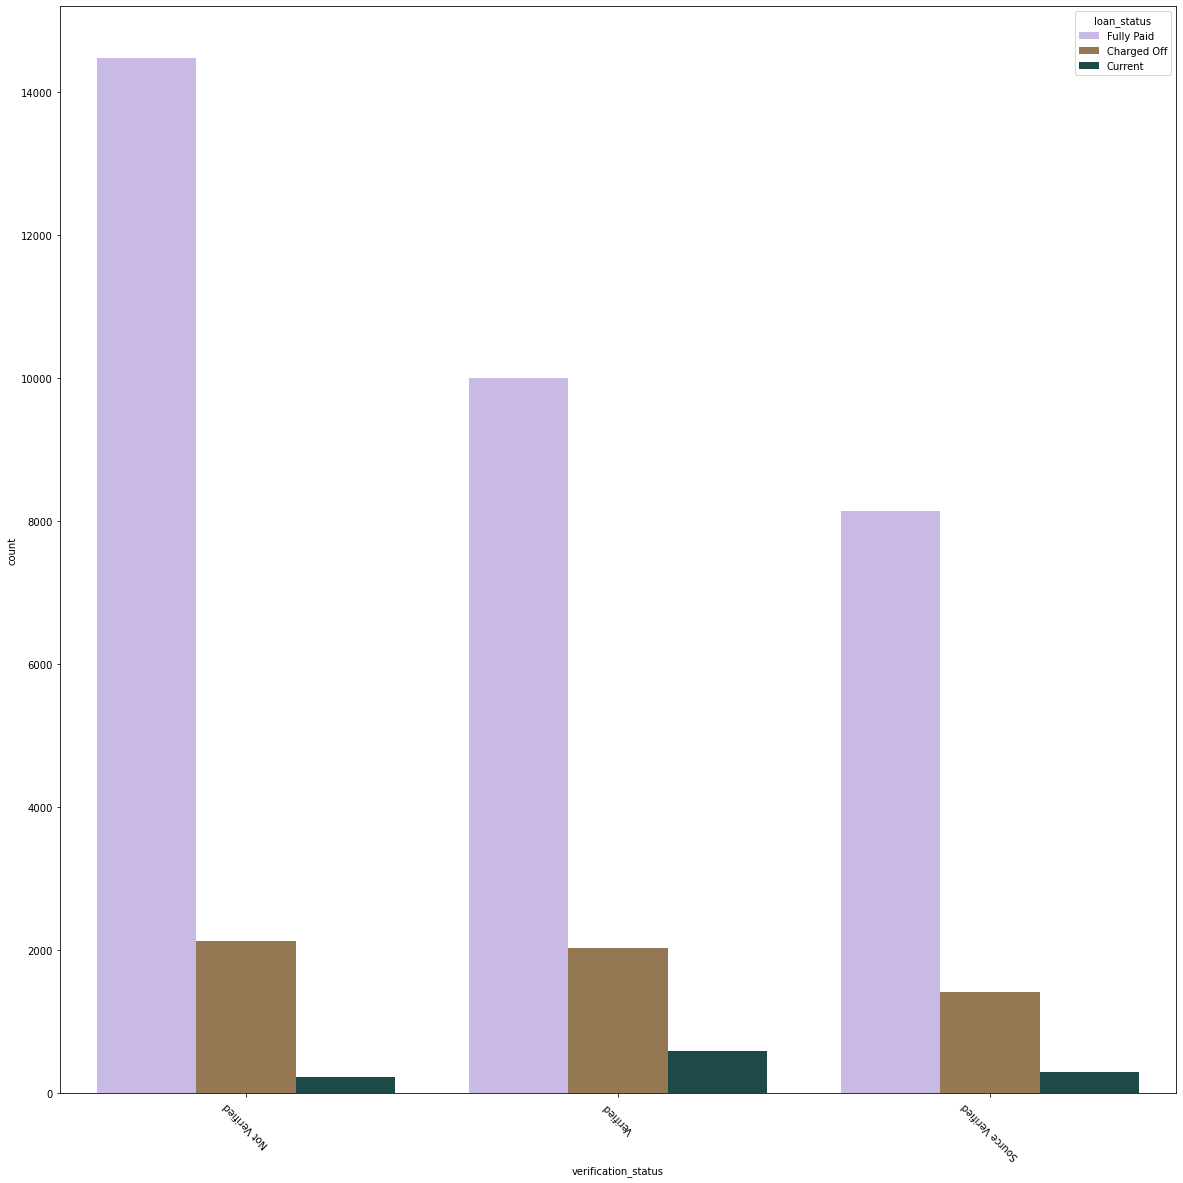

In [185]:
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(rotation=135)
sns.countplot(data=loan_df, x=loan_df["verification_status"], hue='loan_status',palette='cubehelix_r',order=loan_df["verification_status"].value_counts(ascending=False).index)
print(json.dumps(loan_df["verification_status"].value_counts().tolist()))

### Purpose vs loan_staus 

[18497, 5089, 3958, 2894, 2166, 1797, 1542, 937, 686, 577, 381, 371, 323, 101]


<AxesSubplot:>

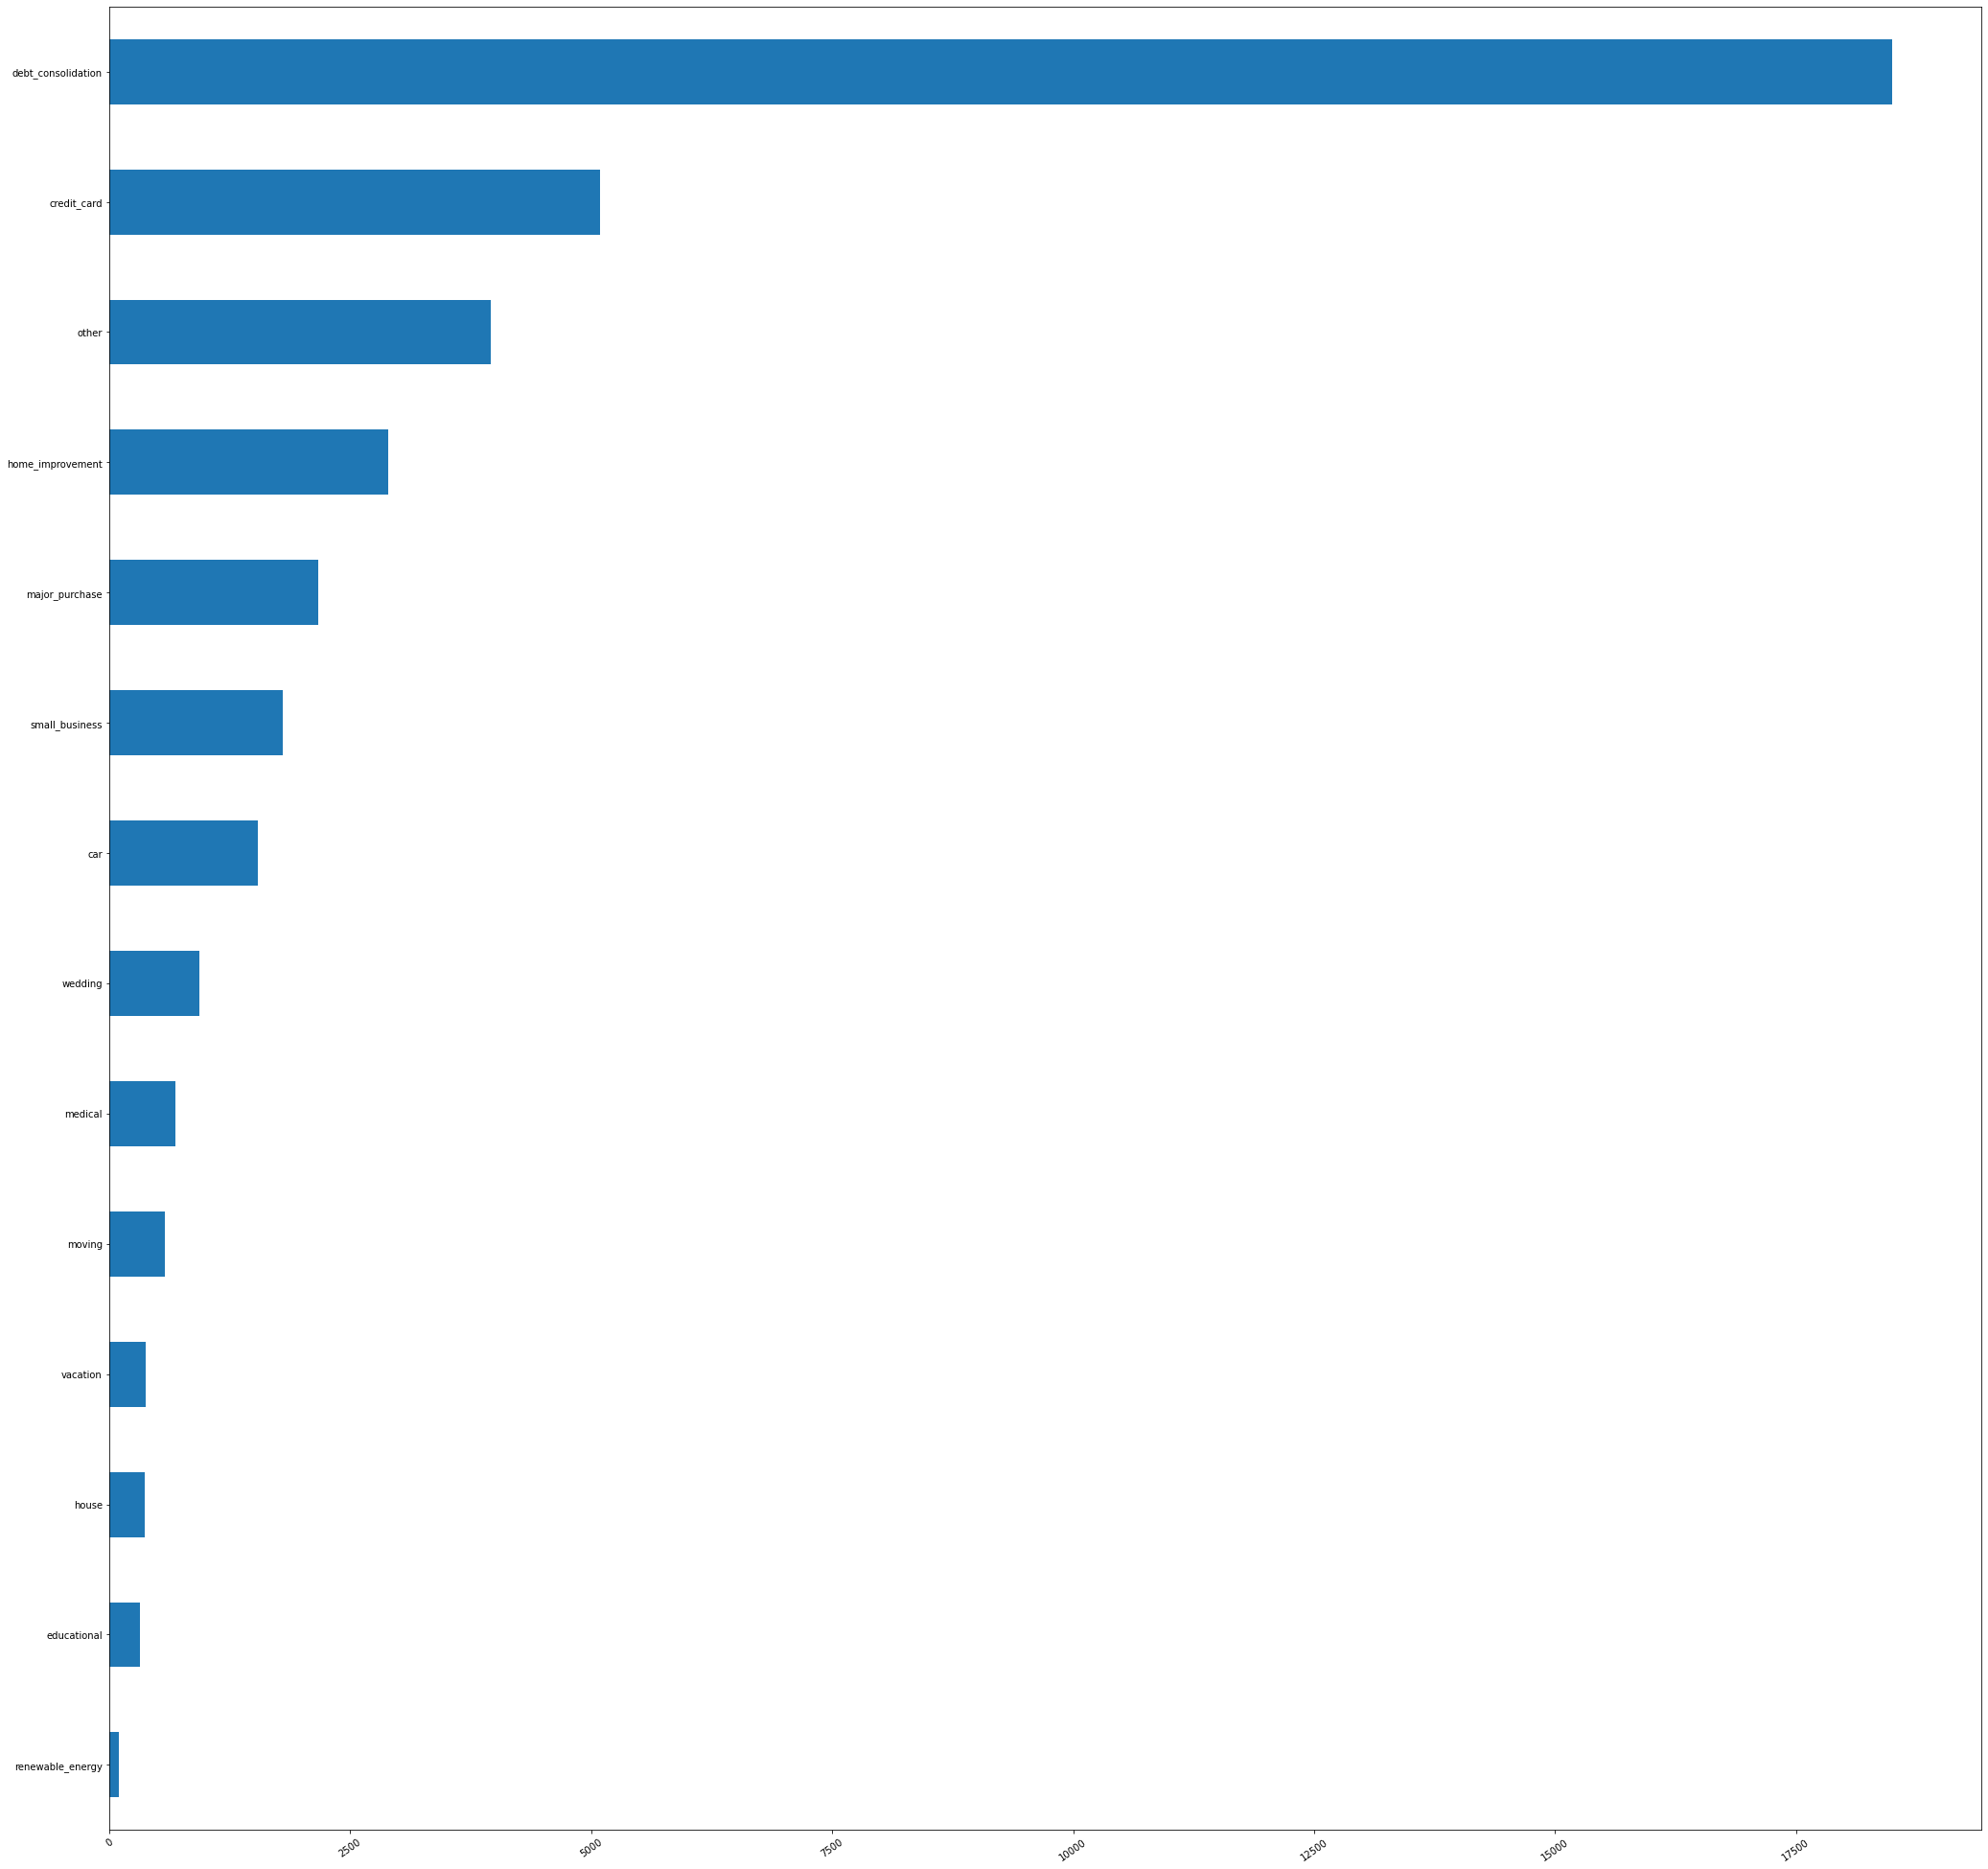

In [186]:
fig, ax = plt.subplots(figsize=(35,35))

plt.xticks(rotation=35)
#sns.countplot(data=loan_df, x=loan_df["purpose"], order=loan_df["purpose"].value_counts(normalize=True,ascending=False).index)
print(json.dumps(loan_df["purpose"].value_counts().tolist()))

#loan_df['purpose'].value_counts()
loan_df["purpose"].value_counts(ascending=True).plot.barh()

### State vs Loan_status

[7032, 3755, 2834, 2694, 1826, 1508, 1505, 1396, 1388, 1321, 1217, 1036, 869, 833, 782, 781, 736, 714, 681, 613, 492, 468, 459, 451, 449, 429, 324, 298, 271, 257, 245, 214, 194, 184, 177, 174, 169, 114, 85, 83, 79, 64, 54, 19, 17, 9, 6, 5, 5, 3]


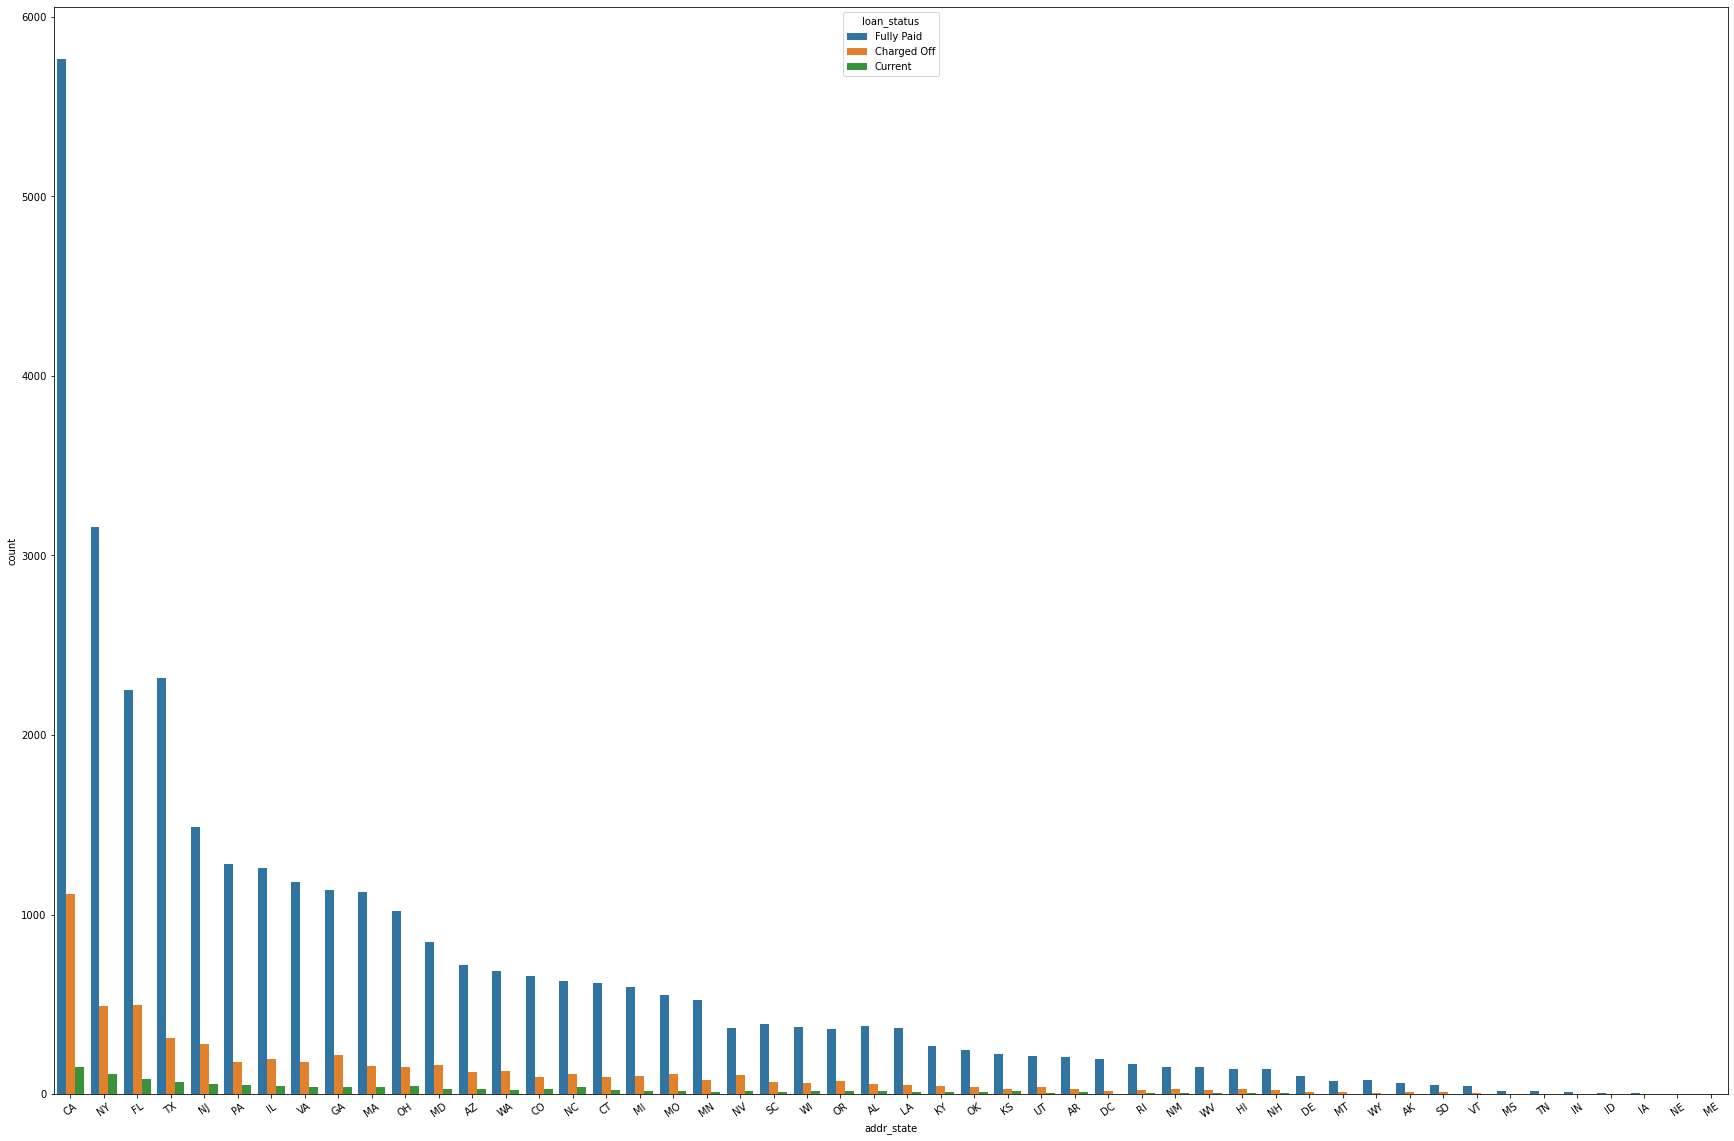

In [231]:
fig, ax = plt.subplots(figsize=(30,20))
plt.xticks(rotation=35)
sns.countplot(data=loan_df, x=loan_df["addr_state"], hue='loan_status', order=loan_df["addr_state"].value_counts(ascending=False,normalize=True).index)
print(json.dumps(loan_df['addr_state'].value_counts().to_list()))


## Ordinal Category

### Grade vs home_loan


##### A Letter of Credit (LC) is a document that guarantees the buyer's payment to the sellers

In [188]:
print(data_dict.loc['grade'][0])
print(data_dict.loc['sub_grade'][0])
# WE WILL CHART BUT THE GRADE AND SUB_GRADE MAY BE SIMILAR 

LC assigned loan grade
LC assigned loan subgrade


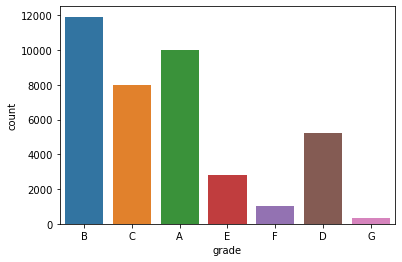

In [189]:
sns.countplot(x='grade', data=loan_df)
plt.show()

<AxesSubplot:xlabel='grade', ylabel='count'>

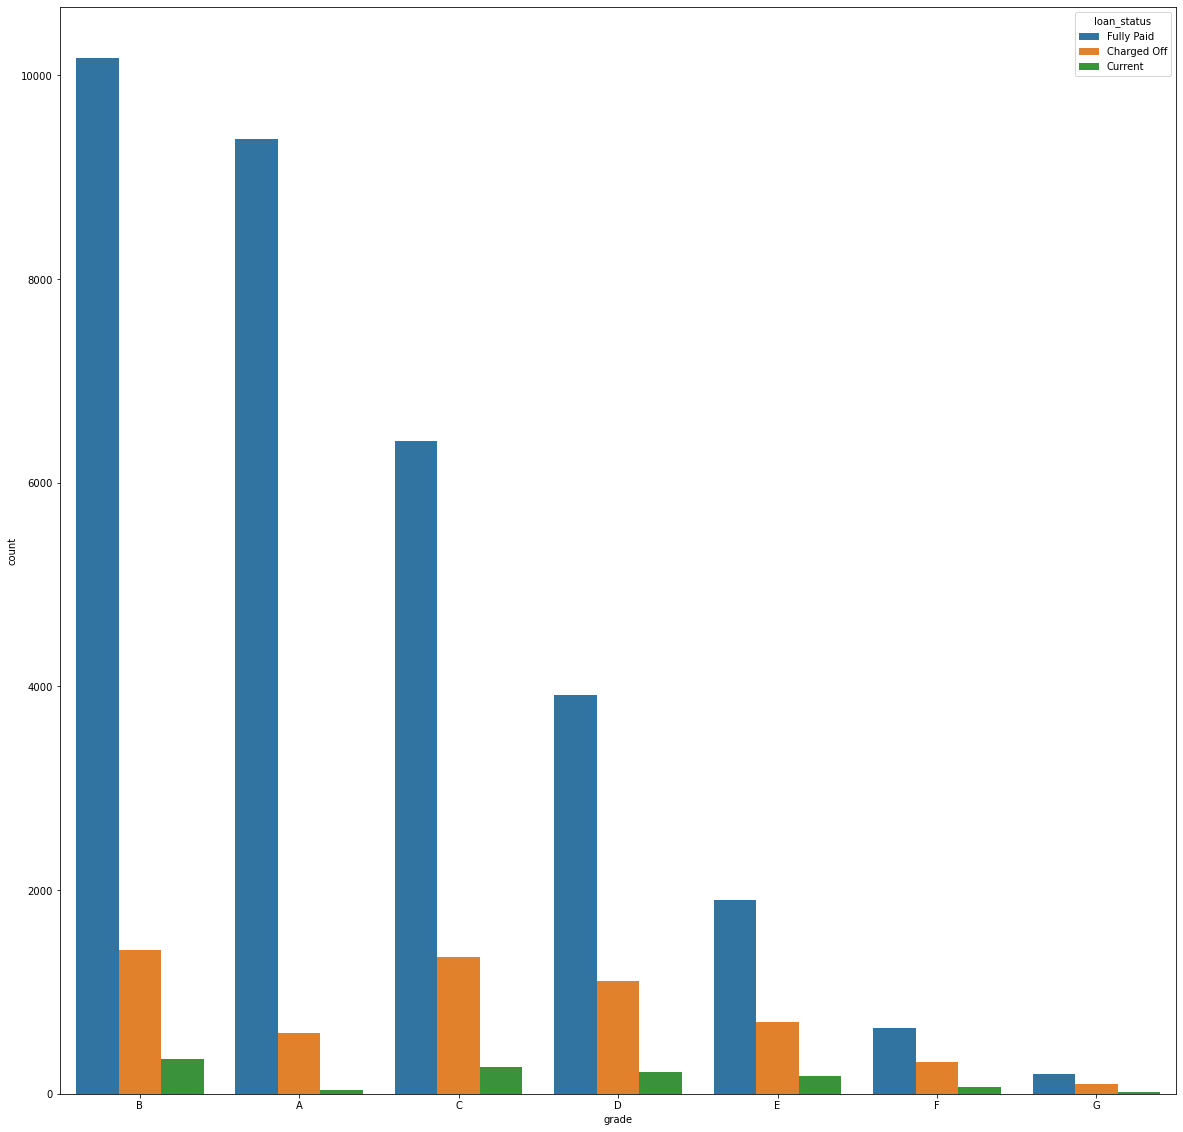

In [190]:
fix, ax = plt.subplots(figsize=(20,20))
sns.countplot(data=loan_df, x=loan_df["grade"], hue='loan_status', order=loan_df["grade"].value_counts(ascending=False).index)

### Sub-Grade vs home_loan

[2884, 2867, 2721, 2689, 2499, 2113, 2034, 1992, 1819, 1799, 1510, 1499, 1330, 1229, 1171, 1159, 1132, 970, 923, 862, 752, 646, 542, 447, 399, 322, 247, 179, 165, 112, 102, 75, 53, 47, 29]


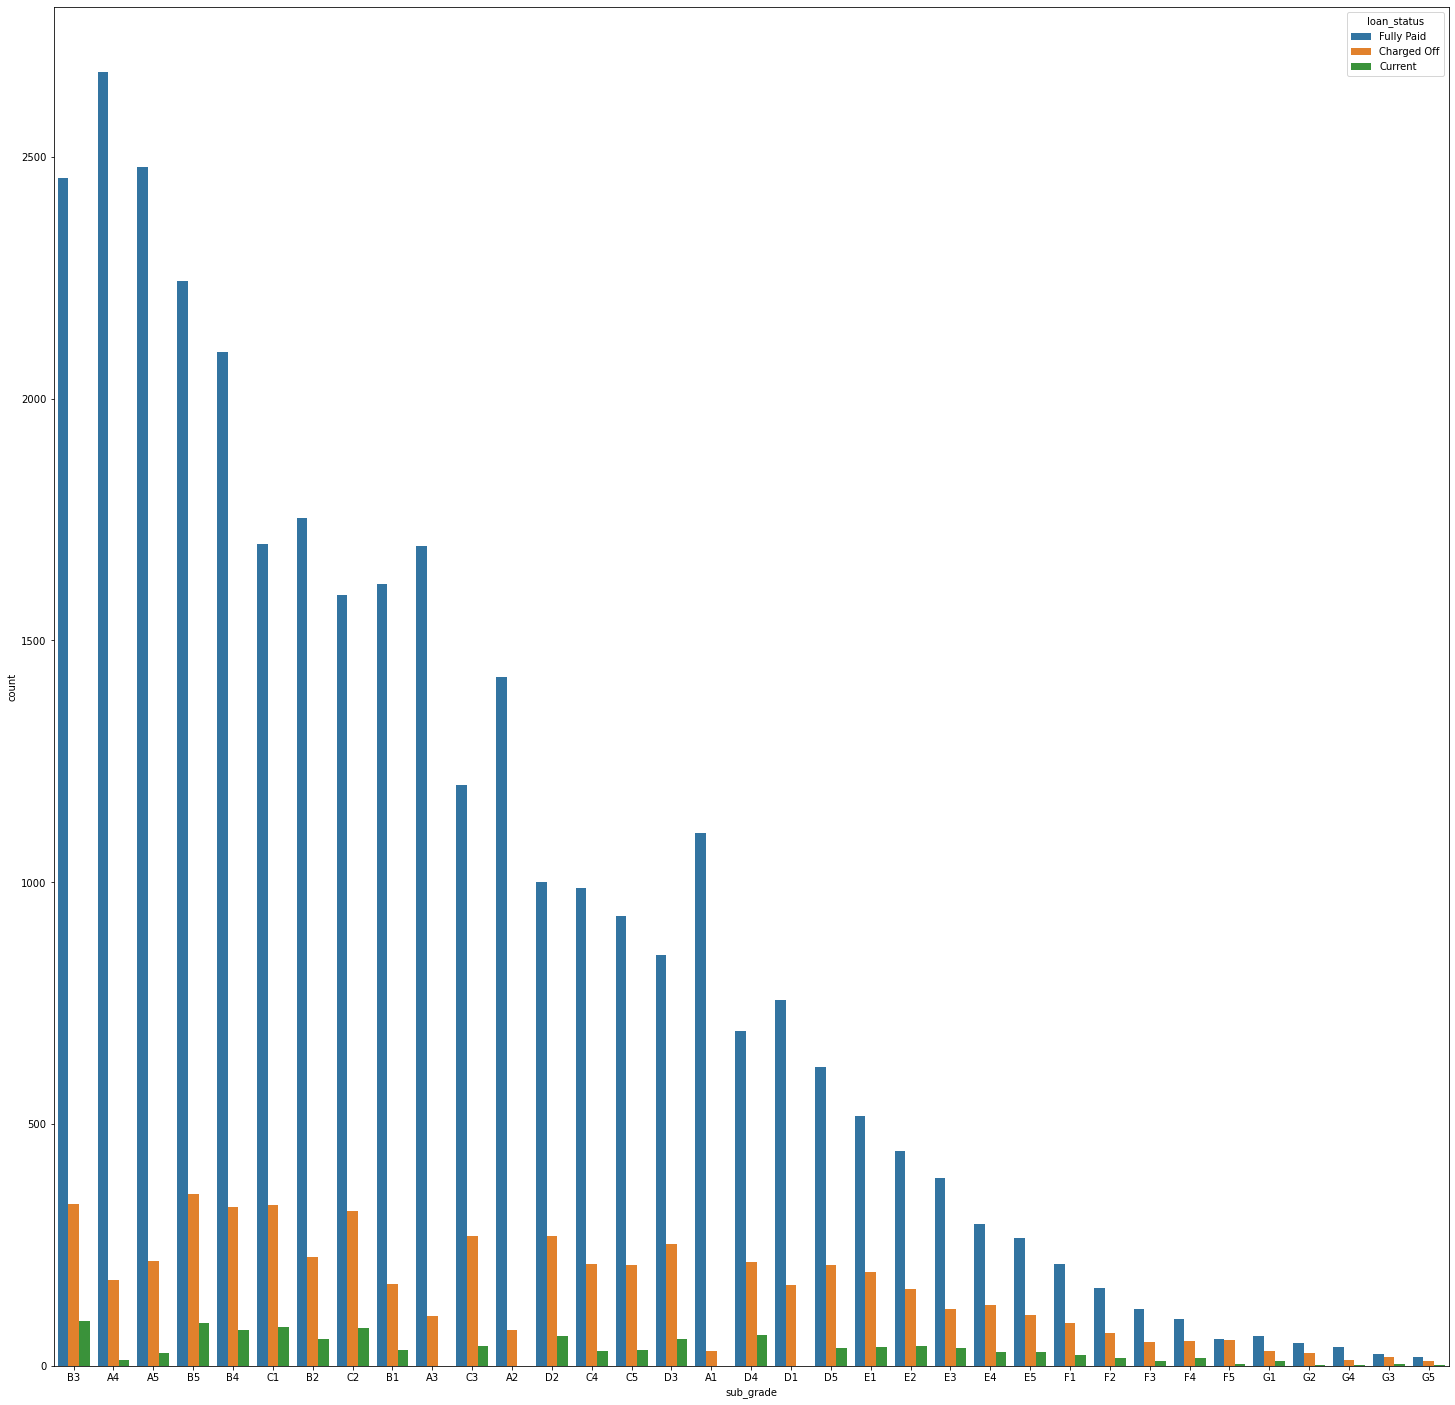

In [191]:
import json
fig, ax = plt.subplots(figsize=(25,25))
sns.countplot(data=loan_df, x=loan_df["sub_grade"], hue='loan_status',order=loan_df["sub_grade"].value_counts(ascending=False).index)
print(json.dumps(loan_df["sub_grade"].value_counts().tolist()))
# Grade is better as it is fewer 

In [192]:
loan_df["emp_title"].value_counts()
## Too many category for emp_title we will skip visualizing

US Army                          134
Bank of America                  109
IBM                               63
AT&T                              59
Kaiser Permanente                 56
                                ... 
Merck and Company Inc.             1
duncan tire co                     1
Bright House Networks              1
Florida Power & Light Company      1
Evergreen Center                   1
Name: emp_title, Length: 28581, dtype: int64

#### Loan issue year vs the loan_status 

[2242, 2203, 2082, 2040, 1910, 1853, 1808, 1671, 1551, 1428, 1369, 1287, 1255, 1117, 1114, 1112, 1075, 1073, 1020, 909, 819, 722, 617, 592, 588, 580, 539, 447, 405, 367, 350, 316, 287, 276, 259, 237, 234, 222, 183, 174, 168, 155, 94, 85, 83, 71, 70, 66, 46, 35, 33, 32, 29, 18, 1]


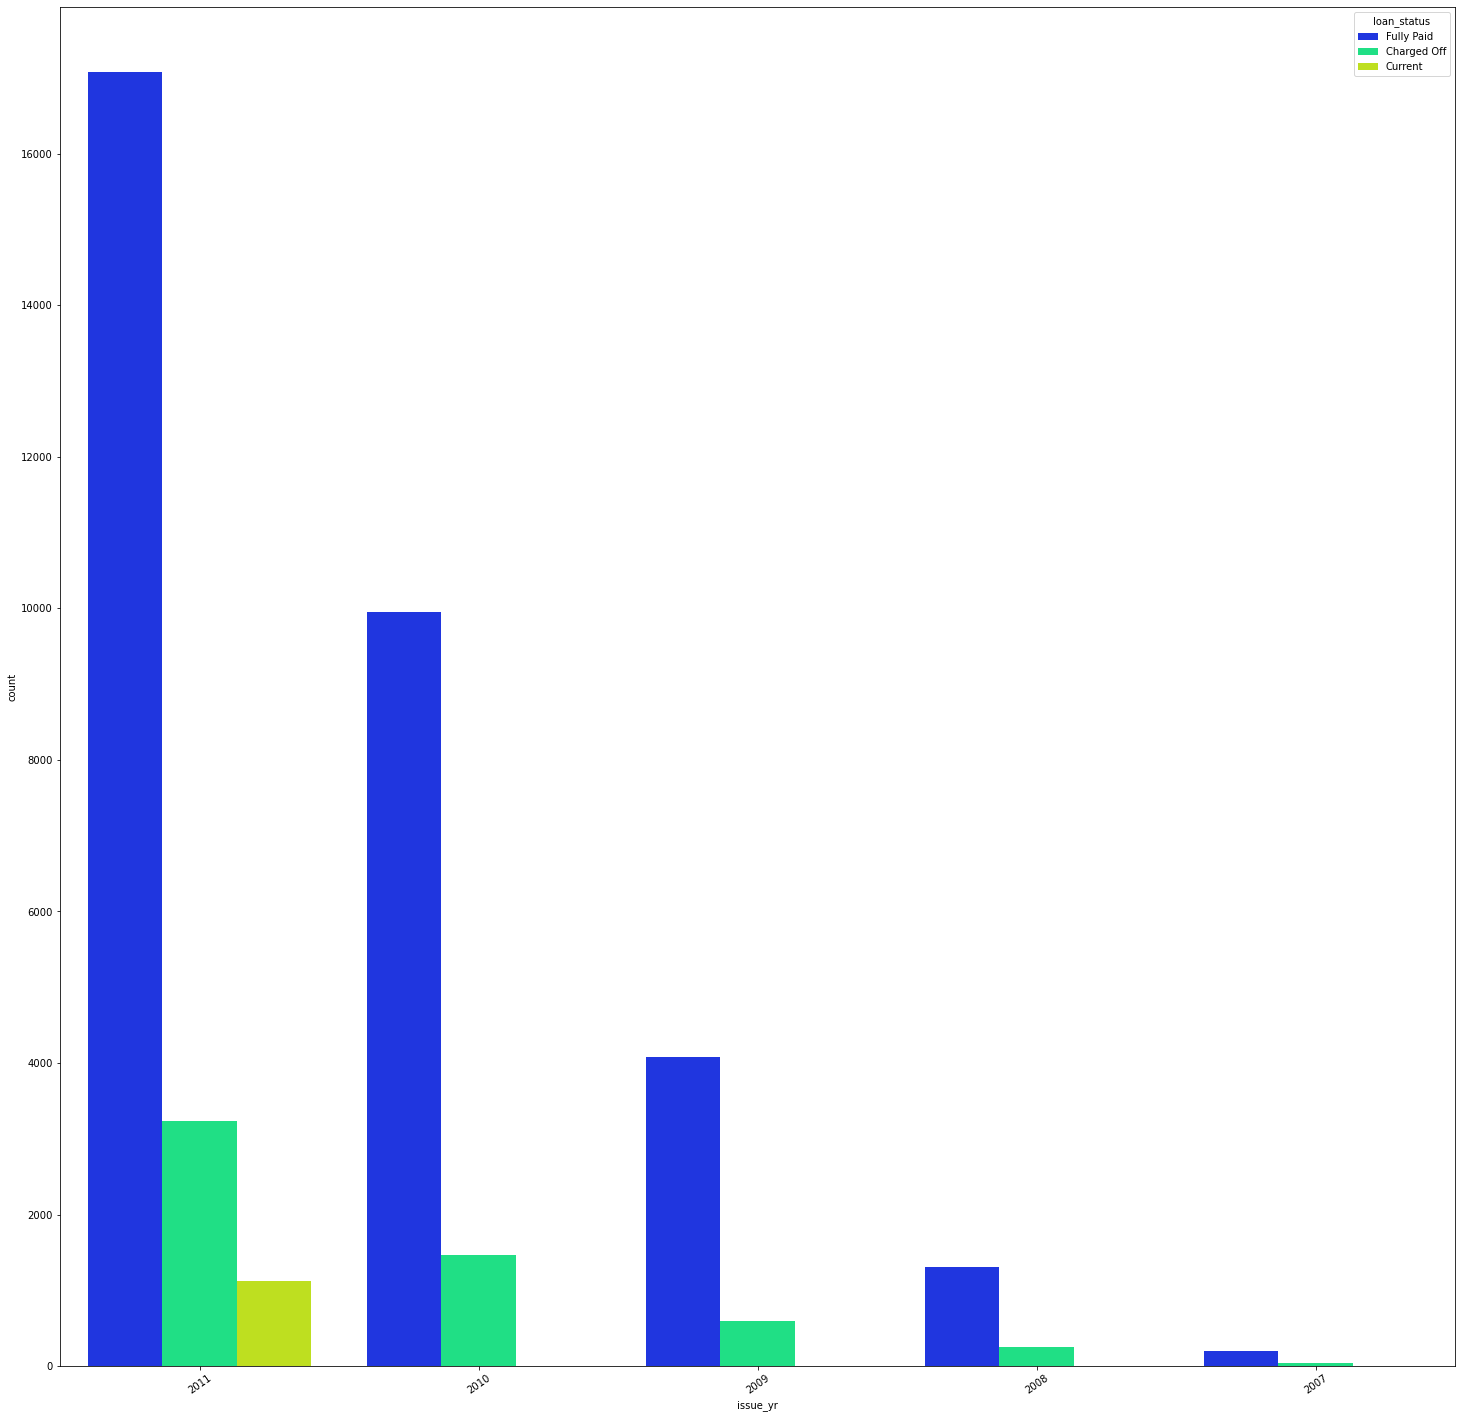

In [193]:
fig, ax = plt.subplots(figsize=(25,25))
plt.xticks(rotation=35)
sns.countplot(data=loan_df, x=loan_df["issue_yr"],hue='loan_status',palette='gist_rainbow_r',order=loan_df["issue_yr"].value_counts(ascending=False).index)
print(json.dumps(loan_df["issue_d"].value_counts().tolist()))

In [194]:
print(loan_df['earliest_cr_line'].unique)
data_dict.loc['earliest_cr_line'][0]

<bound method Series.unique of 0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39319, dtype: object>


"The month the borrower's earliest reported credit line was opened"

In [195]:
data_dict.loc['last_pymnt_d'][0]

'Last month payment was received'

In [196]:
loan_df.groupby('last_pymnt_d')

2013    9376
2014    9180
2012    8811
2011    4949
2015    2403
2016    2019
2010    1821
2009     554
2008     135
0         71
Name: last_pymnt_yr, dtype: int64


<AxesSubplot:xlabel='last_pymnt_yr', ylabel='count'>

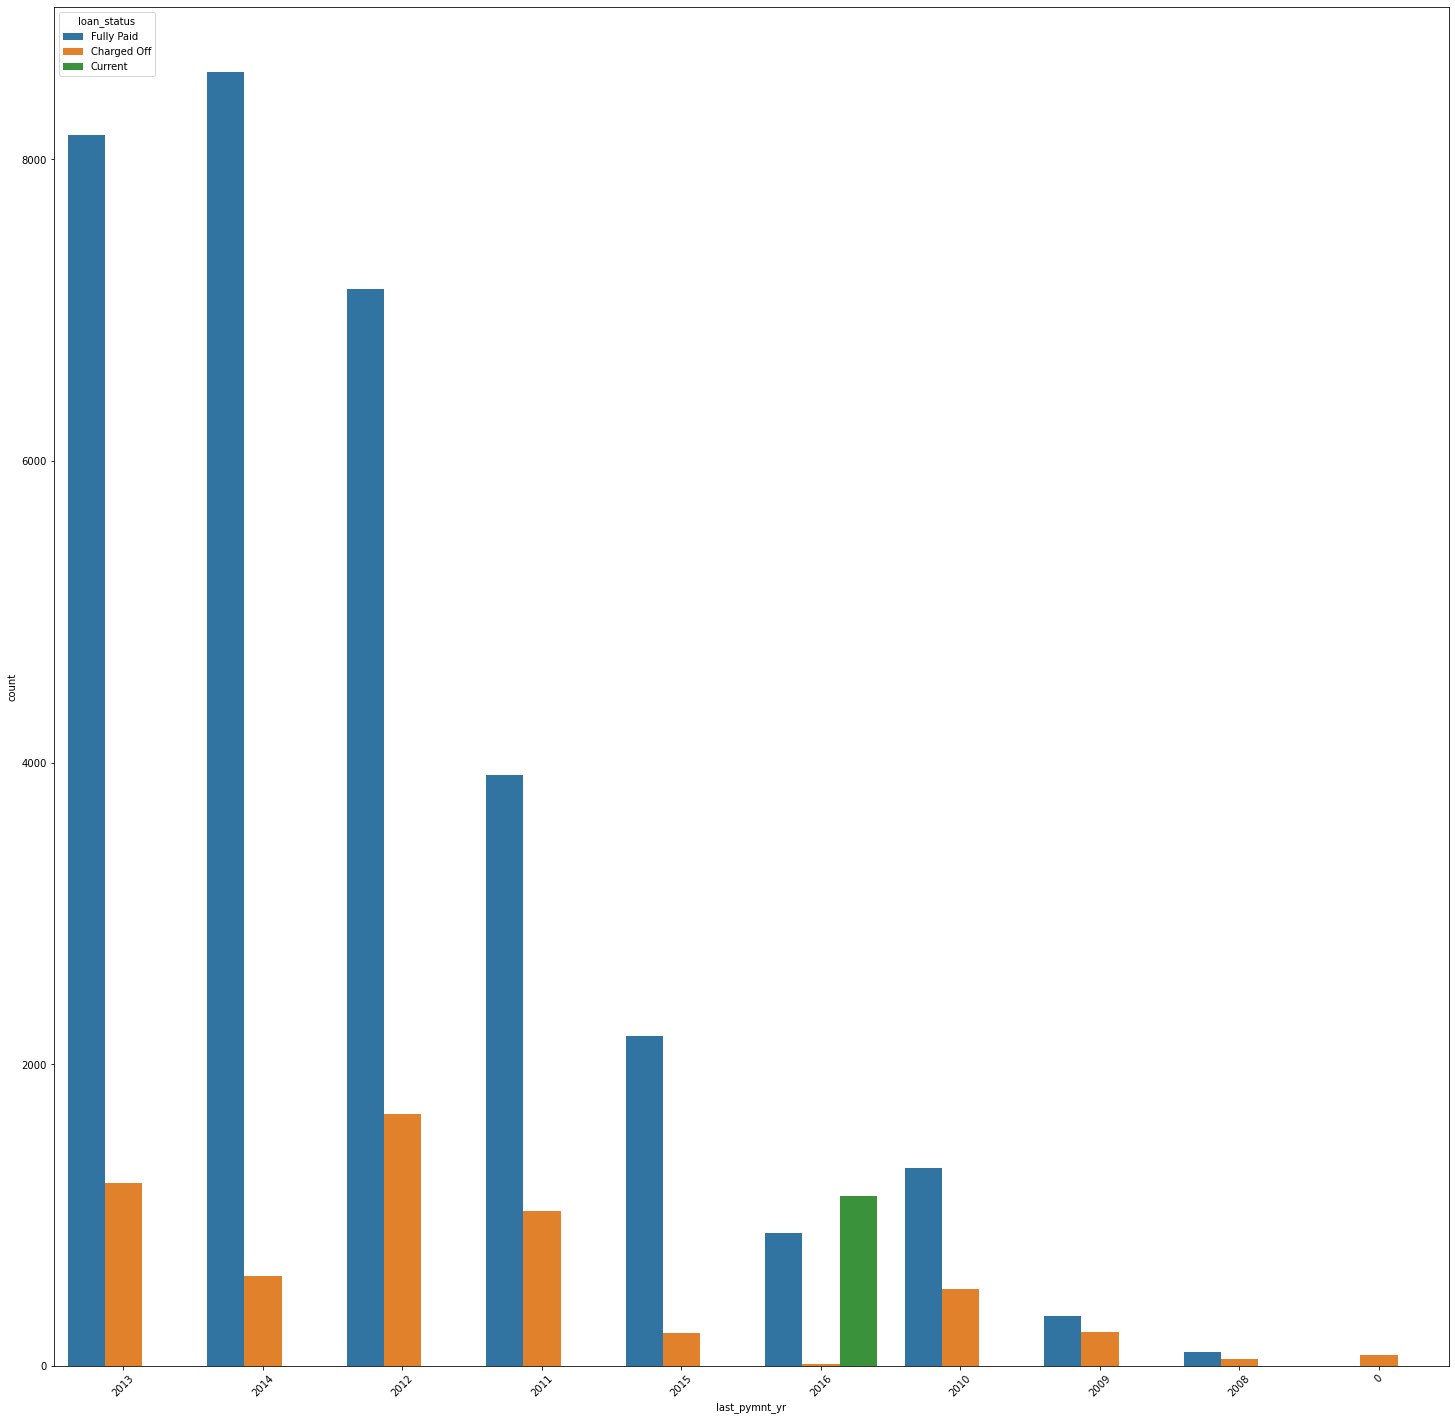

In [197]:
fig,ax = plt.subplots(figsize=(25,25))
plt.xticks(rotation=45)
loan_df['last_pymnt_yr'] = pd.to_datetime(loan_df['last_pymnt_d'], format = '%b-%y').dt.year
loan_df['last_pymnt_yr'] = loan_df['last_pymnt_yr'].apply(lambda x: 0 if pd.isnull(x) else x)
loan_df['last_pymnt_yr'] = loan_df['last_pymnt_yr'].astype('int')
print(loan_df['last_pymnt_yr'].value_counts())
# Note 0 just filled as that meant not available 
sns.countplot(data=loan_df,hue='loan_status',x=loan_df['last_pymnt_yr'],order=loan_df['last_pymnt_yr'].value_counts(ascending=False).index)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

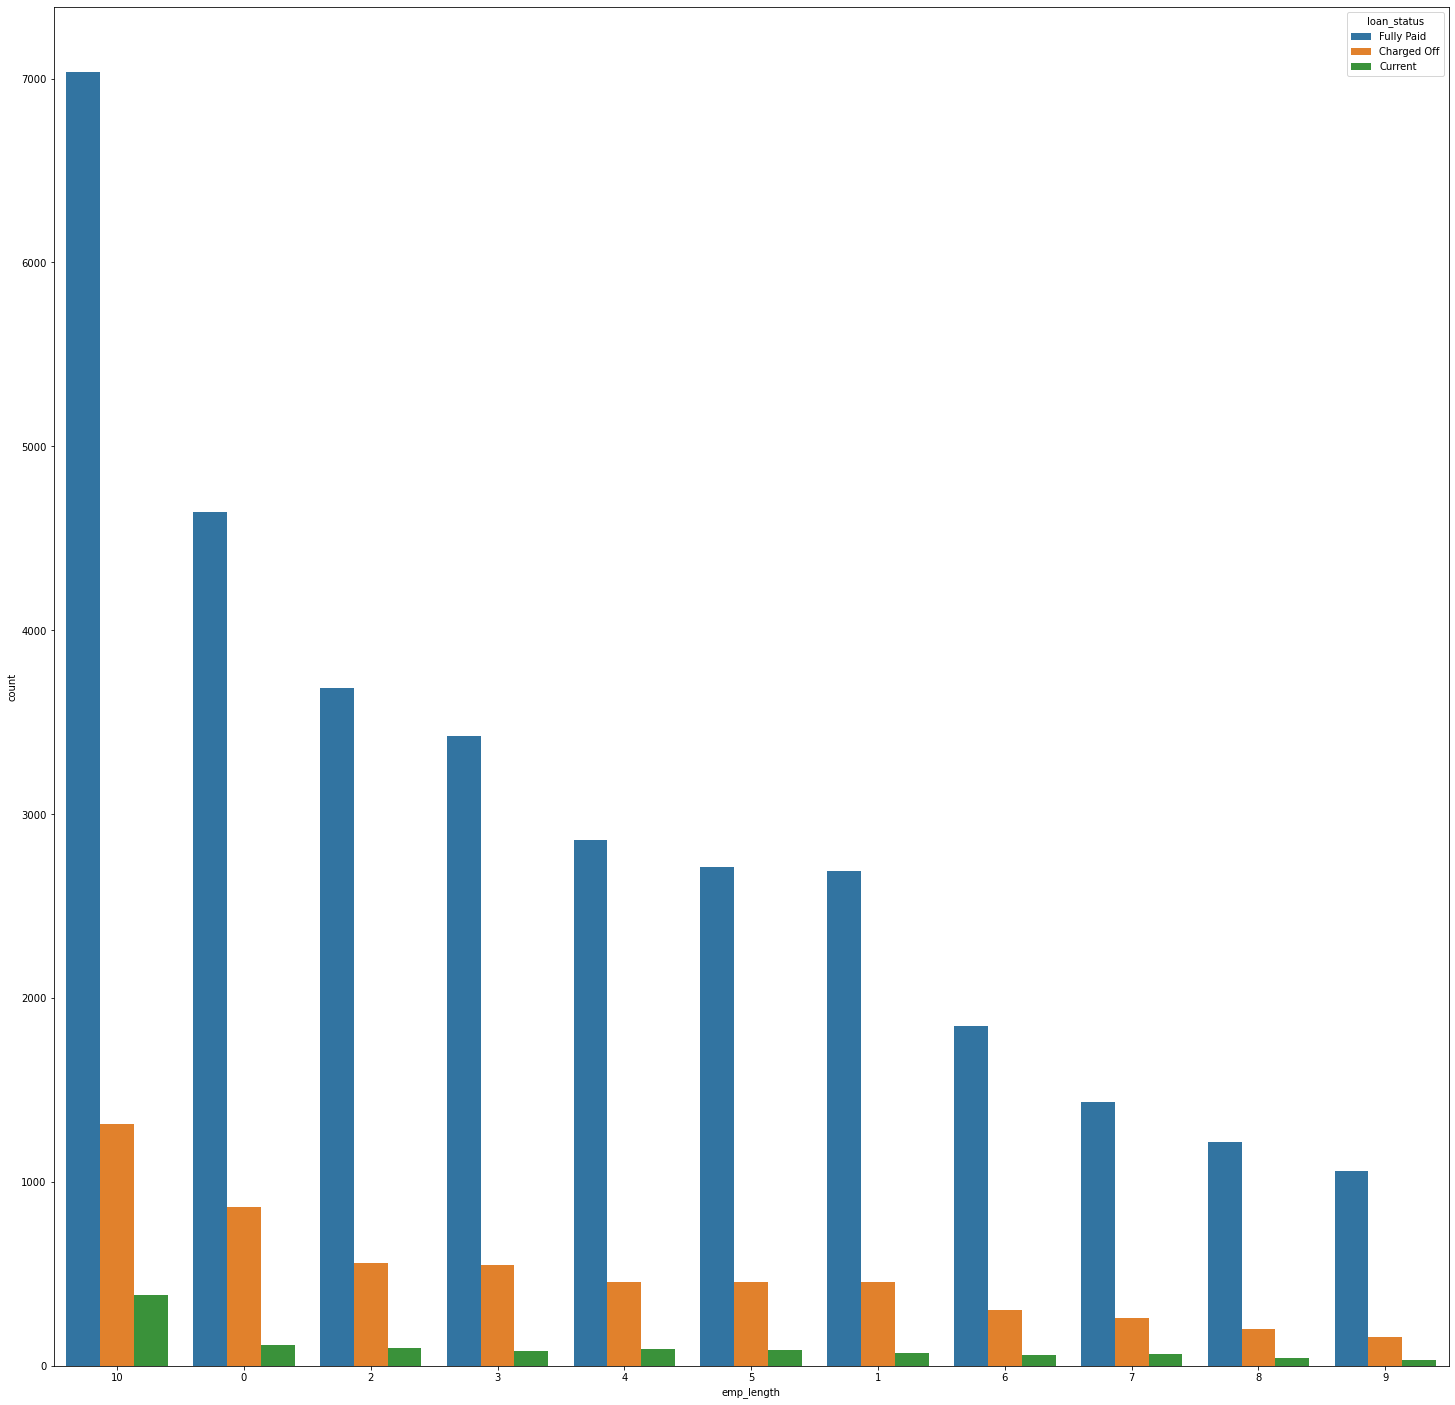

In [198]:
fig,ax = plt.subplots(figsize=(25,25))
ax.set(xlabel='common xlabel', ylabel='common ylabel')
sns.countplot(data=loan_df,x=loan_df['emp_length'],hue='loan_status',order=loan_df['emp_length'].value_counts(ascending=False).index)


In [199]:
s  = "term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d"
for col in s.split(','):
    print(data_dict.loc[col][0])
    

The number of payments on the loan. Values are in months and can be either 36 or 60.
LC assigned loan grade
LC assigned loan subgrade
The job title supplied by the Borrower when applying for the loan.
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
Indicates if income was verified by LC, not verified, or if the income source was verified
The month which the loan was funded
Current status of the loan
A category provided by the borrower for the loan request. 
The first 3 numbers of the zip code provided by the borrower in the loan application.
The state provided by the borrower in the loan application
The month the borrower's earliest reported credit line was opened
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Last month payment was received
The most recent month LC pulled credit for this loan


### Univariate Numerical or Quantitative 

In [200]:
quantitative

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'issue_yr']

In [201]:
loan_df[quantitative].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39319.0,11134.114550,7376.086312,500.00,5400.000,10000.00,15000.00000,35000.00
funded_amnt,39319.0,10865.956662,7108.680268,500.00,5300.000,9600.00,15000.00000,35000.00
funded_amnt_inv,39319.0,10320.302968,7049.759305,0.00,5000.000,8900.00,14270.94942,35000.00
int_rate,39319.0,12.006142,3.717367,5.42,9.250,11.83,14.54000,24.59
installment,39319.0,322.017733,206.206225,15.69,166.190,278.92,426.10000,1305.19
emp_length,39319.0,4.829090,3.603009,0.00,2.000,4.00,9.00000,10.00
annual_inc,39319.0,65524.215803,35215.885297,4000.00,40000.000,58000.00,81000.00000,234996.00
dti,39319.0,13.376622,6.663140,0.00,8.270,13.48,18.64000,29.99
delinq_2yrs,39319.0,0.145502,0.490268,0.00,0.000,0.00,0.00000,11.00
inq_last_6mths,39319.0,0.866757,1.067856,0.00,0.000,1.00,1.00000,8.00


In [202]:
## lets pick some Quantitative 
#funded_amnt
#int_rate
#installment
#recoveries
quantitative_anlysis = ['loan_amnt', 'funded_amnt','int_rate','installment','recoveries' ,'loan_status']
loan_df[quantitative_anlysis]

,loan_amnt,funded_amnt,int_rate,installment,recoveries,loan_status
0,5000,5000,10.65,162.87,0.00,Fully Paid
1,2500,2500,15.27,59.83,117.08,Charged Off
2,2400,2400,15.96,84.33,0.00,Fully Paid
3,10000,10000,13.49,339.31,0.00,Fully Paid
4,3000,3000,12.69,67.79,0.00,Current
...,...,...,...,...,...,...
39712,2500,2500,8.07,78.42,0.00,Fully Paid
39713,8500,8500,10.28,275.38,0.00,Fully Paid
39714,5000,5000,8.07,156.84,0.00,Fully Paid
39715,5000,5000,7.43,155.38,0.00,Fully Paid


In [203]:
loan_df[quantitative_anlysis].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39319.0,11134.114550,7376.086312,500.00,5400.00,10000.00,15000.00,35000.00
funded_amnt,39319.0,10865.956662,7108.680268,500.00,5300.00,9600.00,15000.00,35000.00
int_rate,39319.0,12.006142,3.717367,5.42,9.25,11.83,14.54,24.59
installment,39319.0,322.017733,206.206225,15.69,166.19,278.92,426.10,1305.19
recoveries,39319.0,94.803409,686.094613,0.00,0.00,0.00,0.00,29623.35


In [204]:
loan_df.pivot_table(index='loan_status', values=['funded_amnt','int_rate','installment','recoveries'],aggfunc=[np.mean,np.median])

loan_df.groupby('loan_status')['int_rate','funded_amnt','installment','recoveries'].describe().T

loan_status         Charged Off       Current    Fully Paid
int_rate    count   5584.000000   1126.000000  32609.000000
            mean      13.808626     15.000861     11.594074
            std        3.648676      3.598350      3.591723
            min        5.420000      6.000000      5.420000
            25%       11.280000     11.990000      8.490000
            50%       13.570000     14.650000     11.490000
            75%       16.400000     17.887500     13.980000
            max       24.400000     24.590000     24.110000
funded_amnt count   5584.000000   1126.000000  32609.000000
            mean   11696.136282  16382.770870  10533.298323
            std     7719.856788   8128.752098   6867.955926
            min      900.000000   1000.000000    500.000000
            25%     5500.000000  11343.750000   5000.000000
            50%    10000.000000  15000.000000   9000.000000
            75%    16000.000000  21112.500000  14400.000000
            max    35000.000000  35000.000000  35000.000000
installment count   5584.000000   1126.000000  32609.000000
            mean     334.277242    392.629307    317.480160
            std      215.309759    202.727193    204.198909
            min       22.790000     21.740000     15.690000
            25%      168.450000    257.300000    164.850000
            50%      292.035000    367.290000    273.760000
            75%      454.375000    518.217500    415.920000
            max     1305.190000    981.450000   1288.100000
recoveries  count   5584.000000   1126.000000  32609.000000
            mean     667.545708      0.000000      0.000000
            std     1712.501979      0.000000      0.000000
            min        0.000000      0.000000      0.000000
            25%        0.000000      0.000000      0.000000
            50%      172.965000      0.000000      0.000000
            75%      592.650000      0.000000      0.000000
            max    29623.350000      0.000000      0.000000

<AxesSubplot:xlabel='funded_amnt', ylabel='loan_status'>

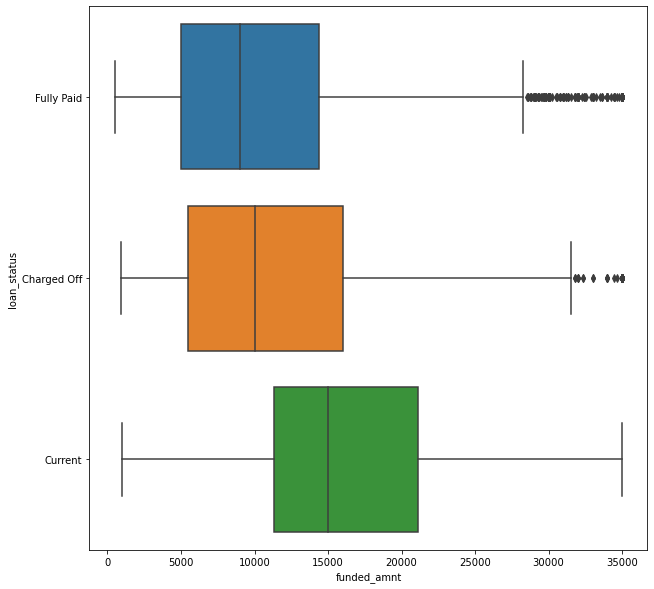

In [205]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'funded_amnt', y = 'loan_status', order=loan_df['loan_status'].unique() ,data = loan_df)

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

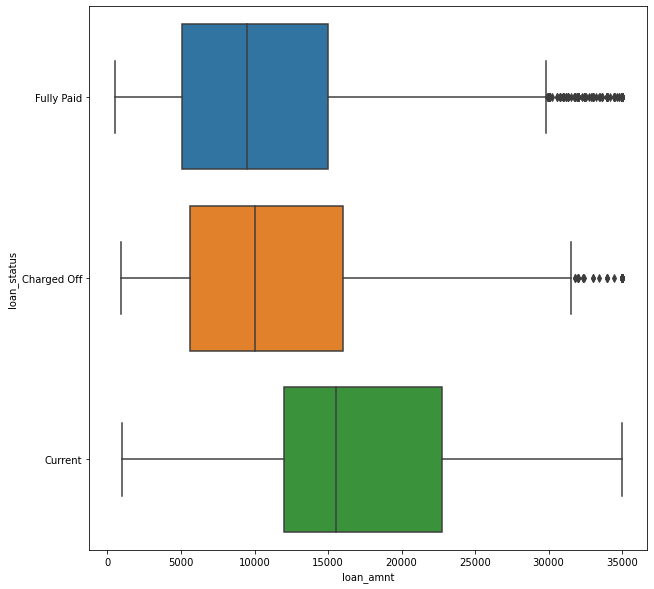

In [206]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'loan_amnt', y = 'loan_status', order=loan_df['loan_status'].unique() ,data = loan_df)

<AxesSubplot:xlabel='int_rate', ylabel='loan_status'>

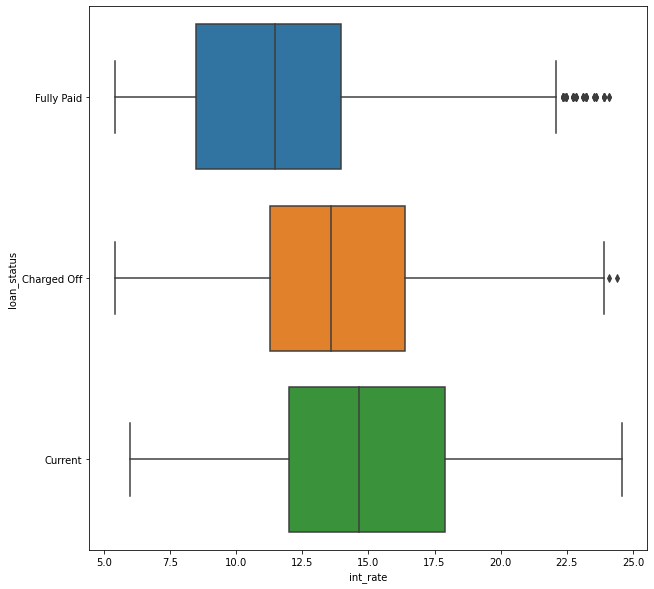

In [207]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'int_rate', y = 'loan_status', order=loan_df['loan_status'].unique() ,data = loan_df)

<AxesSubplot:xlabel='installment', ylabel='loan_status'>

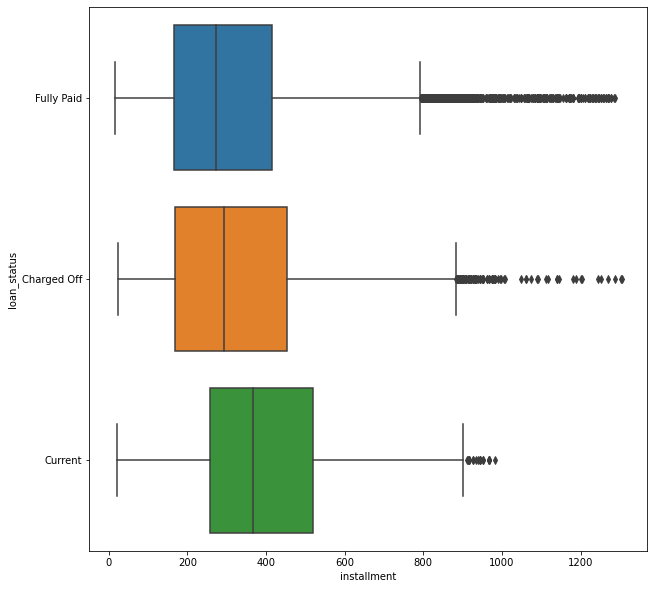

In [208]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'installment', y = 'loan_status', order=loan_df['loan_status'].unique() ,data = loan_df)

'post charge off gross recovery'

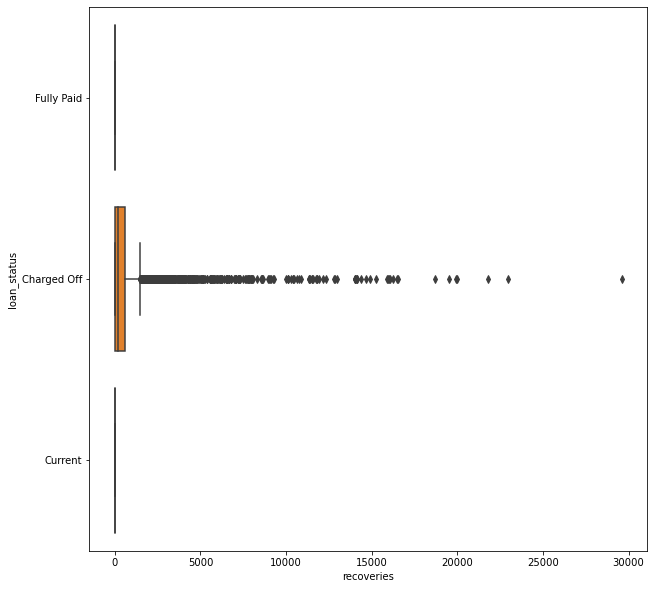

In [209]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'recoveries', y = 'loan_status', order=loan_df['loan_status'].unique() , data = loan_df)
data_dict.loc['recoveries'][0]

# Bi-Variate Analysis 

In [210]:
cols = [ 'home_ownership','purpose','addr_state','term','grade','loan_status']

pairplot_df = loan_df[cols]
pairplot_df.head()

,home_ownership,purpose,addr_state,term,grade,loan_status
0,RENT,credit_card,AZ,36 months,B,Fully Paid
1,RENT,car,GA,60 months,C,Charged Off
2,RENT,small_business,IL,36 months,C,Fully Paid
3,RENT,other,CA,36 months,C,Fully Paid
4,RENT,other,OR,60 months,B,Current


In [211]:
#fig,ax = plt.subplots(figsize=(20,20))
#sns.scatterplot(loan_df['term'])

In [212]:
def make_pivot(index,val,col='loan_status'):
    derived_loan = pd.DataFrame()
    derived_loan = loan_df.pivot_table(values = val,index = index,columns = col , aggfunc=len,fill_value=0)
    #derived_loan = loan_df.pivot_table(values = 'funded_amnt',index = 'home_ownership',
     #                 columns = 'loan_status', aggfunc=len,fill_value=0)
    derived_loan['Percent_Charged_off'] = round(derived_loan['Charged Off'] / derived_loan.sum(axis=1) *100,2)


    x_data = derived_loan.index
    #print(x_data)
    y_data = derived_loan['Percent_Charged_off']
    #y_data
    #derived_loan
    return x_data,y_data,derived_loan.sort_values('Percent_Charged_off',ascending=False)

def draw_graph(x_data,y_data,figsize=(20,20)):
    fig,ax = plt.subplots(figsize=figsize)
    sns.lineplot(data = y_data,estimator=np.mean)
    sns.barplot(x = x_data, y = y_data,estimator=np.mean)
    

### Compare against the home_ownership vs Loan_status

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
home_ownership,,,,
OTHER,18,0,81,18.18
RENT,2824,416,15573,15.01
OWN,440,82,2507,14.53
MORTGAGE,2302,628,14448,13.25


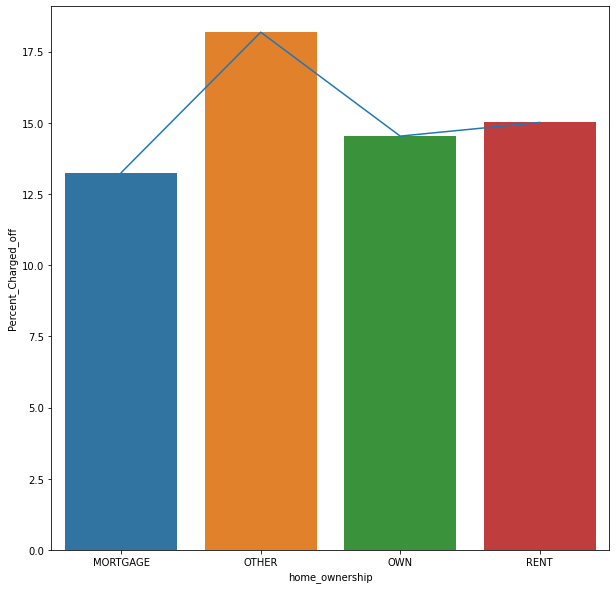

In [213]:
x_data,y_data,pivot_data = make_pivot('home_ownership','funded_amnt')
draw_graph(x_data,y_data,(10,10))
pivot_data

### Compare against the purpose vs Loan_status

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
purpose,,,,
small_business,472,74,1251,26.27
renewable_energy,19,1,81,18.81
educational,55,0,268,17.03
other,629,126,3203,15.89
moving,91,7,479,15.77


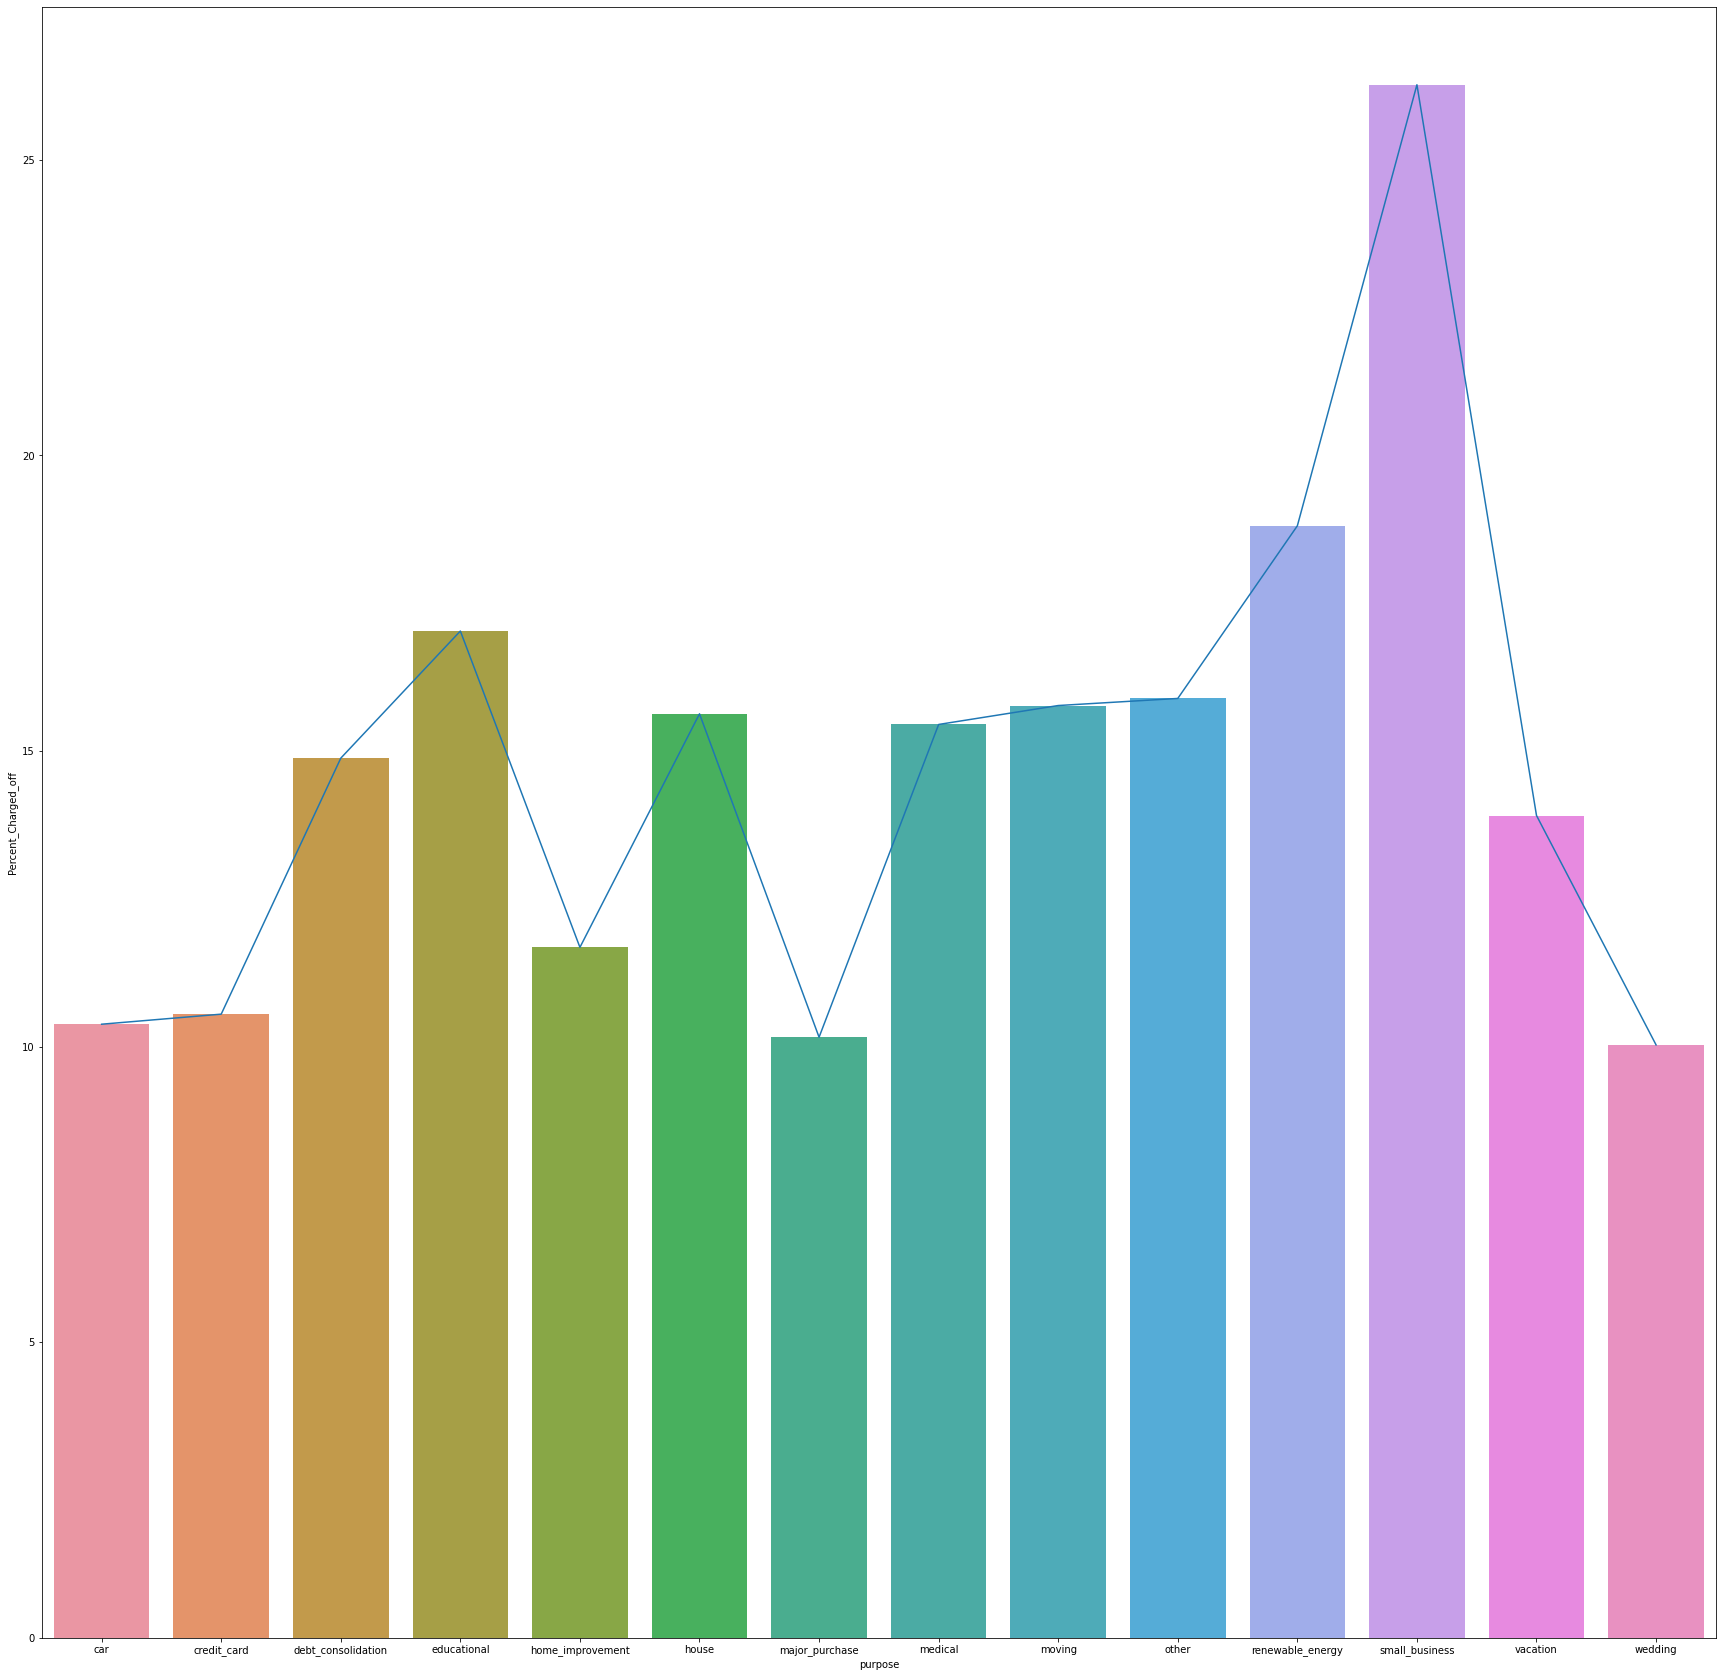

In [232]:
x_data,y_data,pivot_data = make_pivot('purpose','funded_amnt')
draw_graph(x_data,y_data,(30,30))
pivot_data.head()

#fig,ax = plt.subplots(figsize=(50,30))
#sns.lineplot(data = y_data, estimator = np.median )
#sns.barplot(x = x_data, y = y_data, estimator = np.median)

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
emp_length,,,,
0,862,116,4645,15.33
10,1316,386,7038,15.06
7,262,62,1435,14.89
1,455,69,2689,14.16
5,456,87,2712,14.01


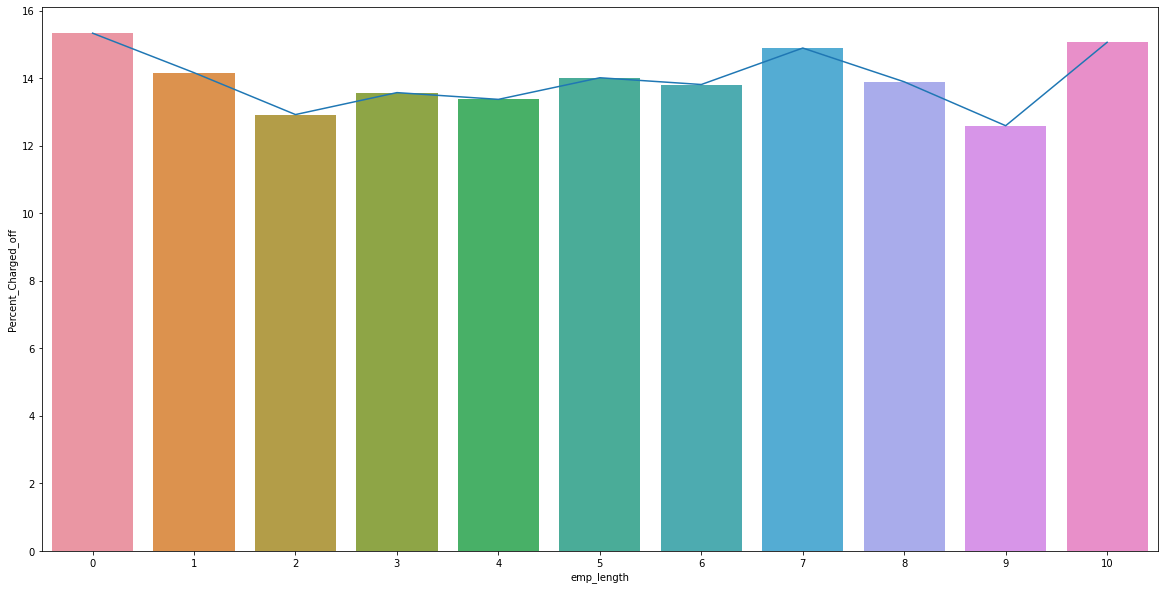

In [215]:
x_data,y_data,pivot_data = make_pivot('emp_length','funded_amnt')
#print(x_data,y_data )
draw_graph(x_data,y_data,(20,10))
pivot_data.head()
#x_data,y_data,pivot_data = make_pivot('emp_length','funded_amnt')
#print(x_data,y_data )
#pivot_data

### Compare against the addr_state vs Loan_status

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
addr_state,,,,
NE,3,0,2,60.00
NV,107,17,368,21.75
SD,12,2,50,18.75
AK,14,2,63,17.72
FL,497,85,2252,17.54


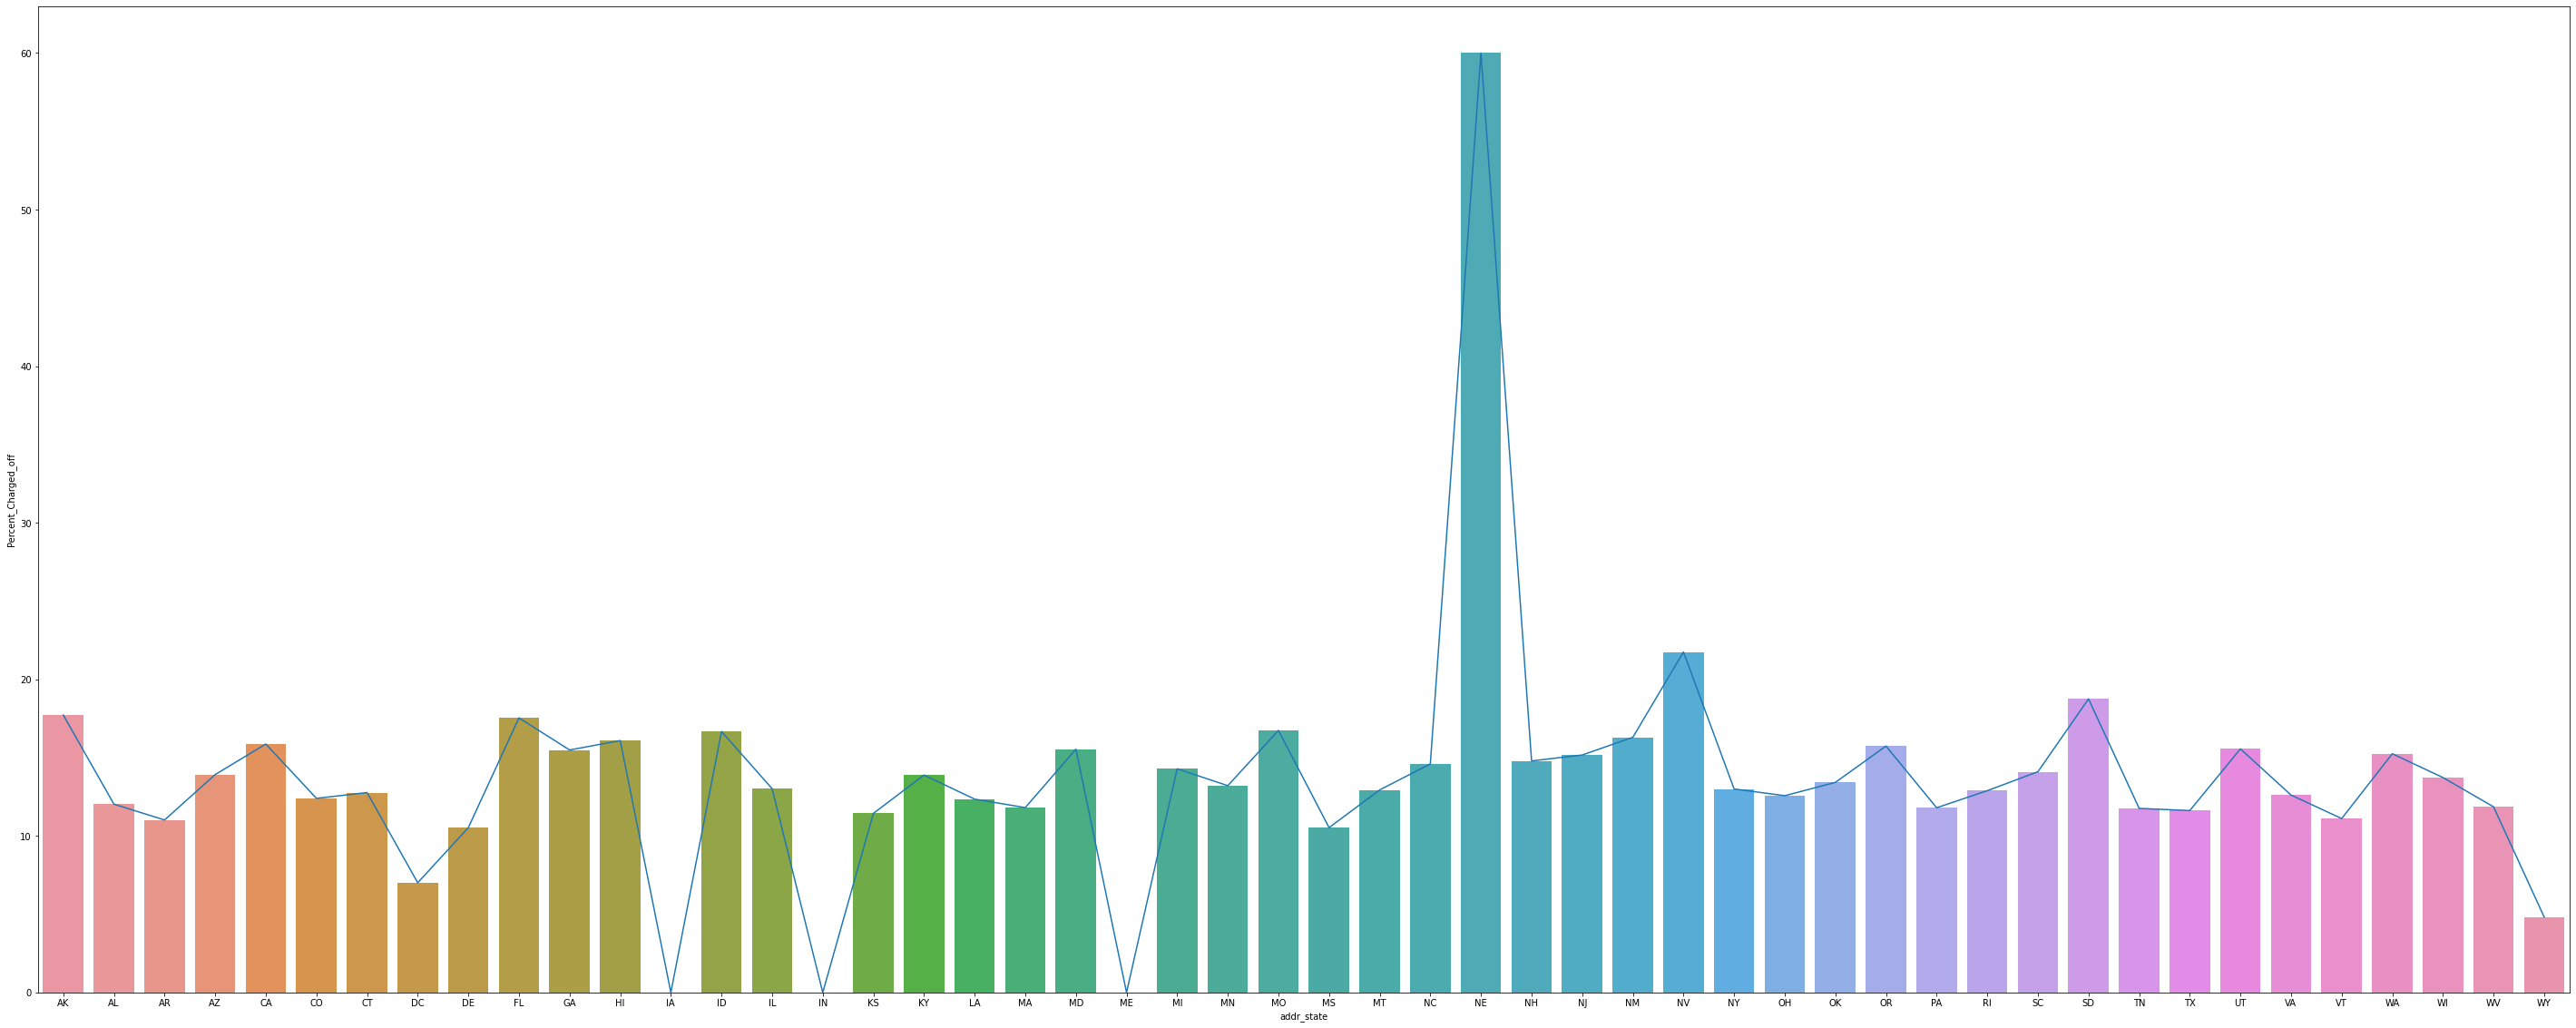

In [233]:
x_data,y_data,pivot_data = make_pivot('addr_state','funded_amnt')
draw_graph(x_data,y_data,(50,20))
pivot_data.head()

### Compare against the int_rate Bins  vs Loan_status

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
int_rate_pct_range,,,,
15-20,290,100,452,34.44
10-15,1775,424,5350,23.51
5-10,2694,525,15404,14.47
0-5,825,77,11403,6.70


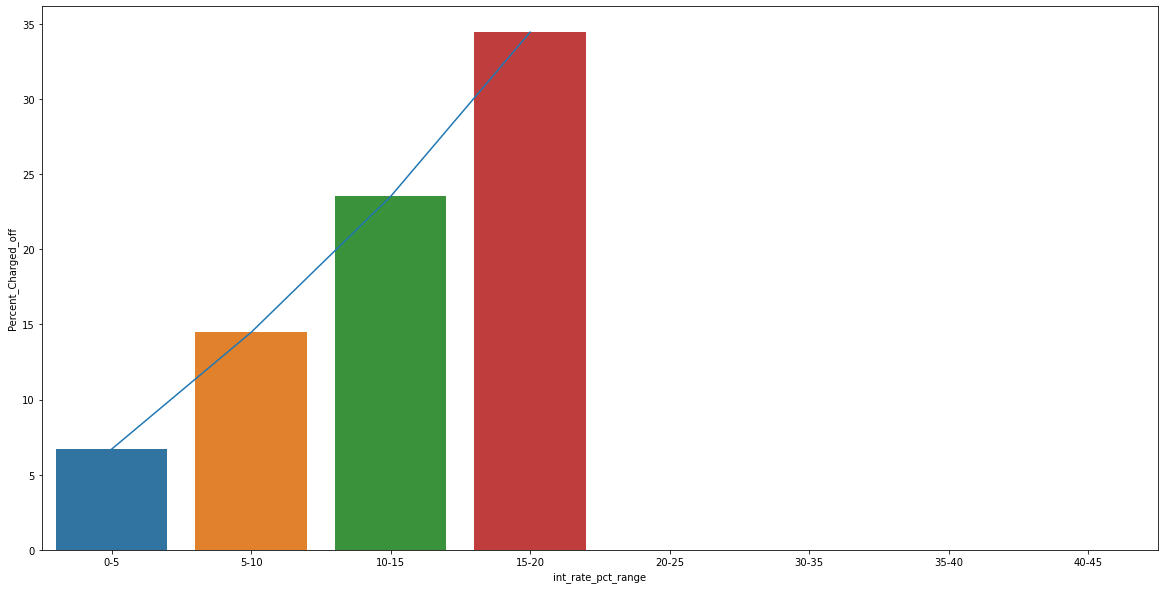

In [234]:
bins = [5, 10, 15, 20, 25, 30 , 35 , 40 ,45 ]
label = ['0-5', '5-10', '10-15', '15-20' , '20-25', '30-35', '35-40', '40-45' ]
loan_df['int_rate_pct_range'] = pd.cut(loan_df['int_rate'], bins, labels = label)
x_data,y_data,pivot_data = make_pivot('int_rate_pct_range','funded_amnt')

draw_graph(x_data,y_data,(20,10))
pivot_data

### Compare against the grade vs Loan_status

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
grade,,,,
G,99,17,190,32.35
F,312,71,642,30.44
E,704,176,1906,25.27
D,1112,216,3916,21.21
C,1342,262,6411,16.74


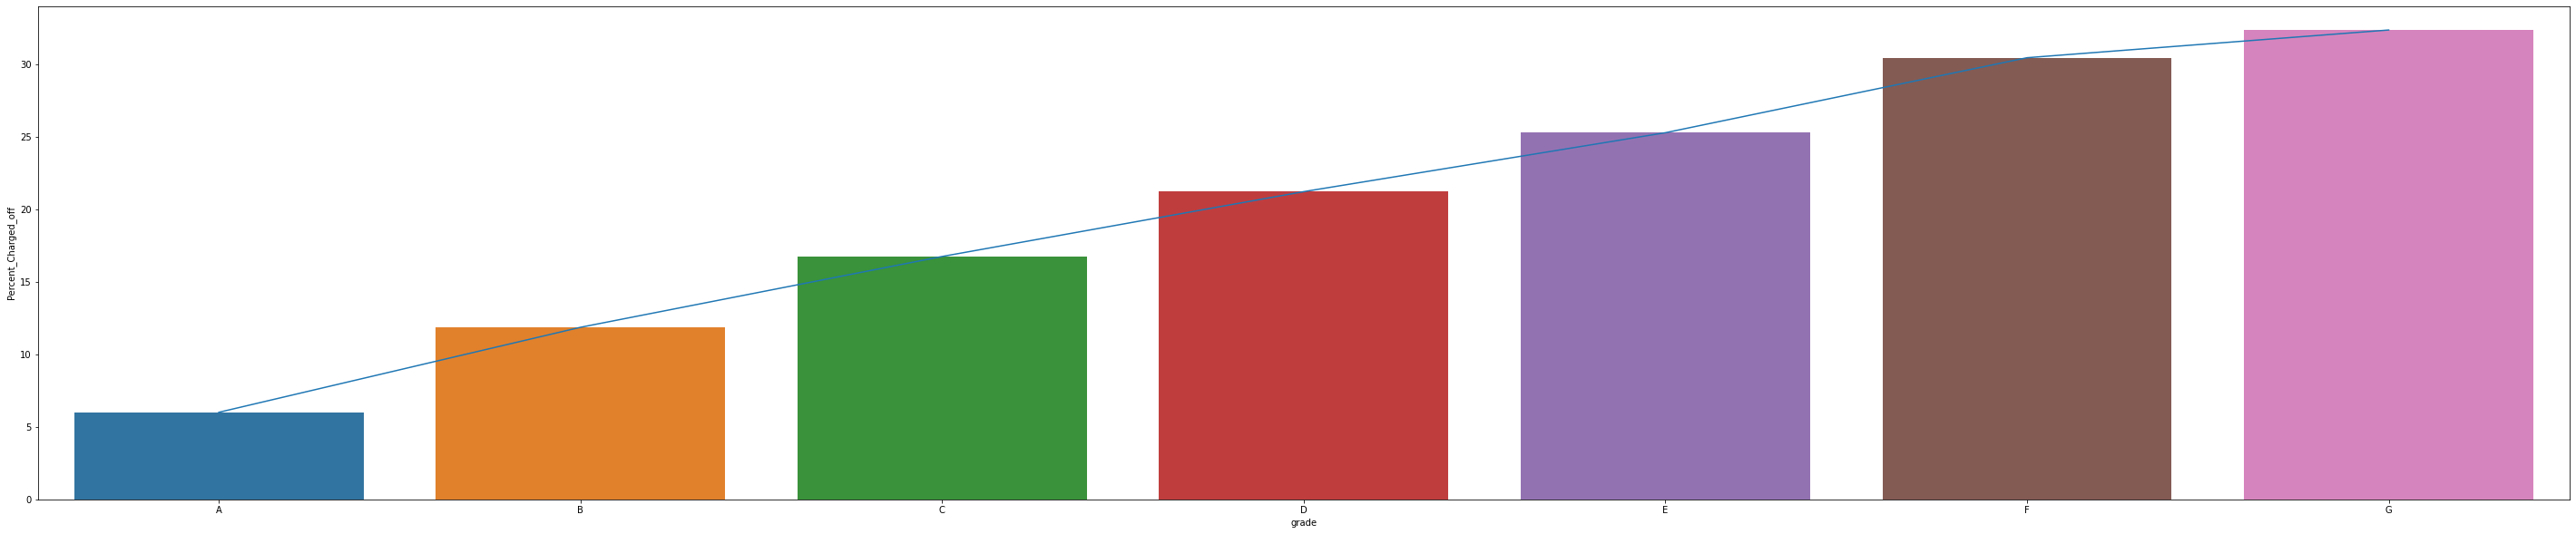

In [218]:
x_data,y_data,pivot_data = make_pivot('grade','funded_amnt')
draw_graph(x_data,y_data,(50,10))
pivot_data.head()

### Compare against the sub_grade vs Loan_status

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
sub_grade,,,,
F5,53,4,55,47.32
G3,19,3,25,40.43
G2,27,1,47,36.00
G5,10,1,18,34.48
F4,52,17,96,31.52


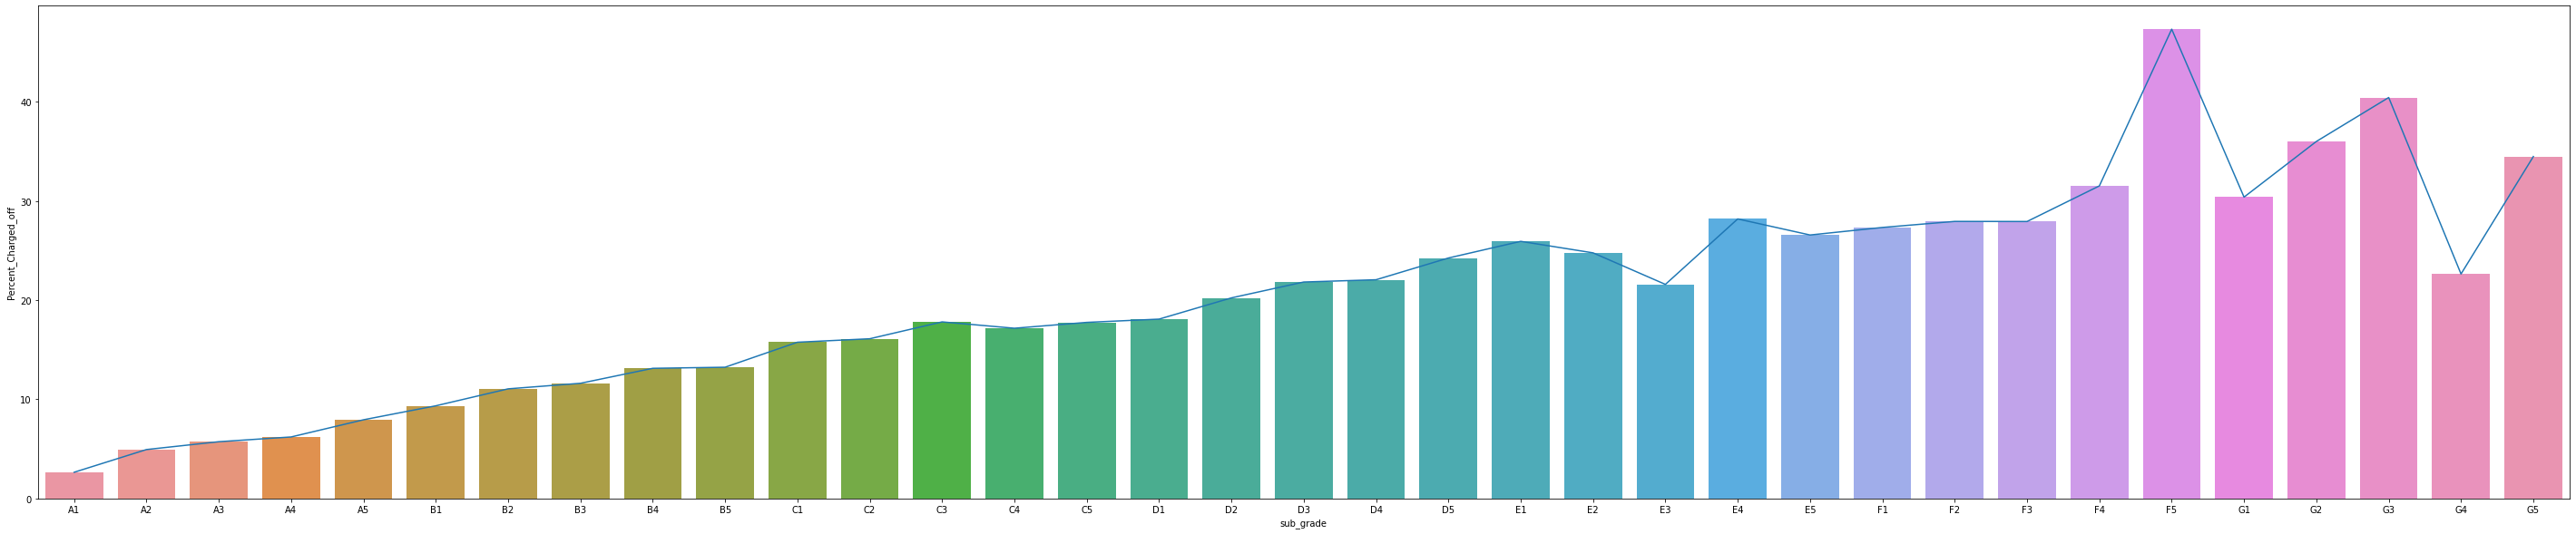

In [219]:
x_data,y_data,pivot_data = make_pivot('sub_grade','funded_amnt')
draw_graph(x_data,y_data,(50,10))
pivot_data.head()

### Compare against the Term vs Loan_status

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
term,,,,
60 months,2383,1126,6990,22.70
36 months,3201,0,25619,11.11


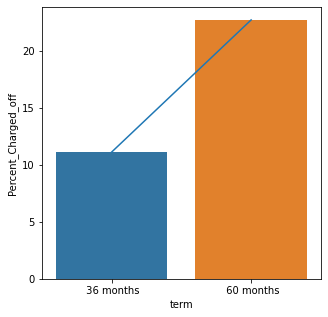

In [220]:
x_data,y_data,pivot_data = make_pivot('term','funded_amnt')
draw_graph(x_data,y_data,(5,5))
pivot_data.head()

### Compare against the issue_yr vs Loan_status

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
issue_yr,,,,
2007,43,0,204,17.41
2008,246,0,1306,15.85
2011,3239,1126,17079,15.10
2010,1466,0,9947,12.85
2009,590,0,4073,12.65


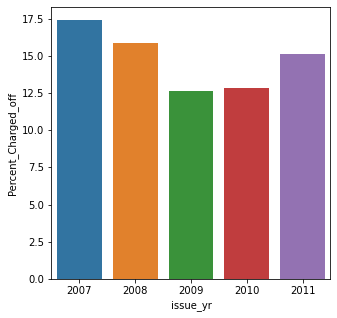

In [221]:
x_data,y_data,pivot_data = make_pivot('issue_yr','funded_amnt')
draw_graph(x_data,y_data,(5,5))
pivot_data.head()

### Continuous

In [222]:
filt= (loan_df['loan_status'] == 'Charged Off')
loan_df_corr = loan_df[filt].reset_index(drop=True)
#filt
#loan_df


In [223]:
loan_df_corr.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,issue_yr,last_pymnt_yr
loan_amnt,1.000000,0.979281,0.907250,0.349623,0.926070,0.203018,0.453498,0.068173,-0.029205,0.006245,...,0.680674,0.642960,0.550234,0.699430,0.088888,0.309388,0.154625,0.332515,0.119595,0.053615
funded_amnt,0.979281,1.000000,0.927163,0.352654,0.953866,0.206026,0.445298,0.065022,-0.026946,0.006283,...,0.697994,0.660251,0.568024,0.712438,0.095847,0.315623,0.161524,0.337826,0.132686,0.050765
funded_amnt_inv,0.907250,0.927163,1.000000,0.367916,0.858102,0.207743,0.405551,0.076279,-0.031707,-0.018336,...,0.685258,0.725691,0.548480,0.718969,0.069546,0.302186,0.137744,0.291481,0.314300,0.058852
int_rate,0.349623,0.352654,0.367916,1.000000,0.326526,0.061100,0.166791,0.041724,0.119349,0.060286,...,0.263813,0.276245,0.068367,0.467997,0.056129,0.160623,0.073284,0.091040,0.179229,-0.006036
installment,0.926070,0.953866,0.858102,0.326526,1.000000,0.175056,0.452031,0.047803,-0.012404,0.016441,...,0.666266,0.615978,0.575510,0.629330,0.121987,0.299745,0.181889,0.348803,0.030197,0.042401
emp_length,0.203018,0.206026,0.207743,0.061100,0.175056,1.000000,0.209242,0.053010,0.008817,0.006762,...,0.167861,0.170659,0.138542,0.177938,-0.020962,0.061999,0.010128,0.045793,0.095476,0.031574
annual_inc,0.453498,0.445298,0.405551,0.166791,0.452031,0.209242,1.000000,-0.055889,0.029778,0.062720,...,0.349989,0.328071,0.289046,0.333745,0.093127,0.183020,0.102761,0.171771,-0.004733,0.048505
dti,0.068173,0.065022,0.076279,0.041724,0.047803,0.053010,-0.055889,1.000000,-0.068889,-0.028906,...,0.046310,0.051617,0.017295,0.071051,-0.035896,0.032832,0.010308,0.001692,0.094825,0.033010
delinq_2yrs,-0.029205,-0.026946,-0.031707,0.119349,-0.012404,0.008817,0.029778,-0.068889,1.000000,-0.012204,...,-0.015859,-0.022740,-0.035091,0.003972,0.028220,0.013665,0.022656,-0.000944,0.012444,-0.023608
inq_last_6mths,0.006245,0.006283,-0.018336,0.060286,0.016441,0.006762,0.062720,-0.028906,-0.012204,1.000000,...,-0.043329,-0.054369,-0.052231,-0.022200,0.017943,-0.013446,-0.004766,0.009359,-0.085660,-0.023877


In [224]:
loan_df_corr_cleaned = loan_df_corr[['loan_amnt', 'funded_amnt','int_rate', 'installment','emp_length','annual_inc','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',]]
loan_df_corr_cleaned.corr()


,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
loan_amnt,1.000000,0.979281,0.349623,0.926070,0.203018,0.453498,0.006245,0.178795,-0.046607,0.309401,0.276266,0.680674,0.642960,0.550234,0.699430,0.088888,0.309388
funded_amnt,0.979281,1.000000,0.352654,0.953866,0.206026,0.445298,0.006283,0.175149,-0.051207,0.293054,0.267066,0.697994,0.660251,0.568024,0.712438,0.095847,0.315623
int_rate,0.349623,0.352654,1.000000,0.326526,0.061100,0.166791,0.060286,0.034464,0.080203,0.072824,-0.015009,0.263813,0.276245,0.068367,0.467997,0.056129,0.160623
installment,0.926070,0.953866,0.326526,1.000000,0.175056,0.452031,0.016441,0.172583,-0.039643,0.294465,0.242238,0.666266,0.615978,0.575510,0.629330,0.121987,0.299745
emp_length,0.203018,0.206026,0.061100,0.175056,1.000000,0.209242,0.006762,0.105956,0.044993,0.147131,0.180971,0.167861,0.170659,0.138542,0.177938,-0.020962,0.061999
annual_inc,0.453498,0.445298,0.166791,0.452031,0.209242,1.000000,0.062720,0.276616,0.001266,0.461292,0.374310,0.349989,0.328071,0.289046,0.333745,0.093127,0.183020
inq_last_6mths,0.006245,0.006283,0.060286,0.016441,0.006762,0.062720,1.000000,0.078819,0.014739,-0.014446,0.102593,-0.043329,-0.054369,-0.052231,-0.022200,0.017943,-0.013446
open_acc,0.178795,0.175149,0.034464,0.172583,0.105956,0.276616,0.078819,1.000000,0.050788,0.328954,0.684418,0.118972,0.105420,0.099124,0.118506,-0.019850,0.053117
pub_rec,-0.046607,-0.051207,0.080203,-0.039643,0.044993,0.001266,0.014739,0.050788,1.000000,-0.061933,0.017267,-0.040959,-0.042371,-0.033875,-0.017583,-0.038180,-0.052924
revol_bal,0.309401,0.293054,0.072824,0.294465,0.147131,0.461292,-0.014446,0.328954,-0.061933,1.000000,0.357506,0.224119,0.202041,0.184173,0.211868,0.033486,0.122249


<AxesSubplot:>

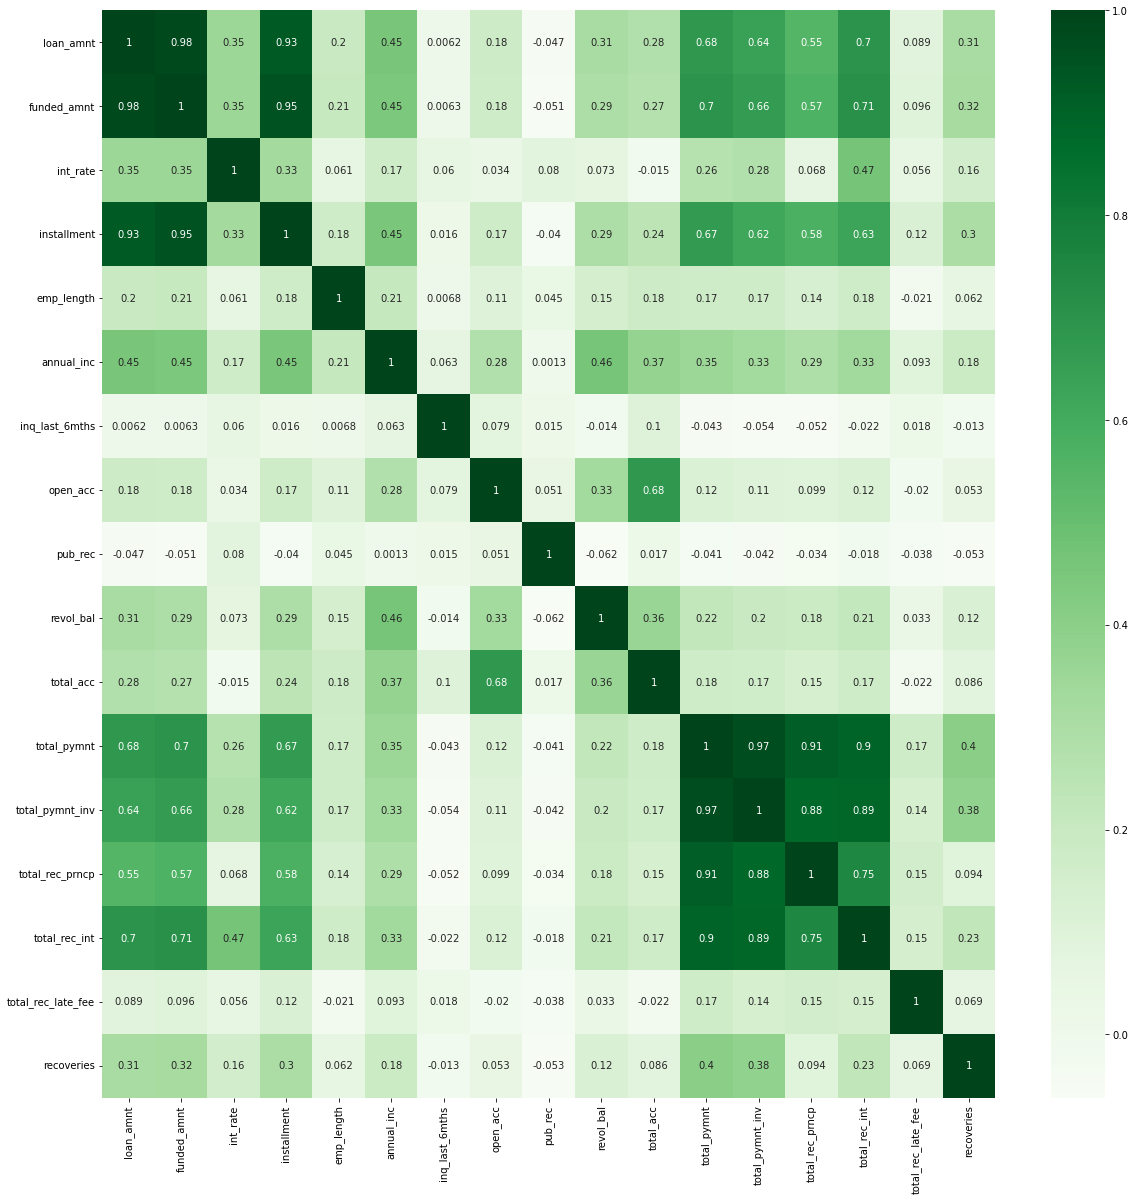

In [229]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(loan_df_corr_cleaned.corr(),cmap='Greens',annot=True,)

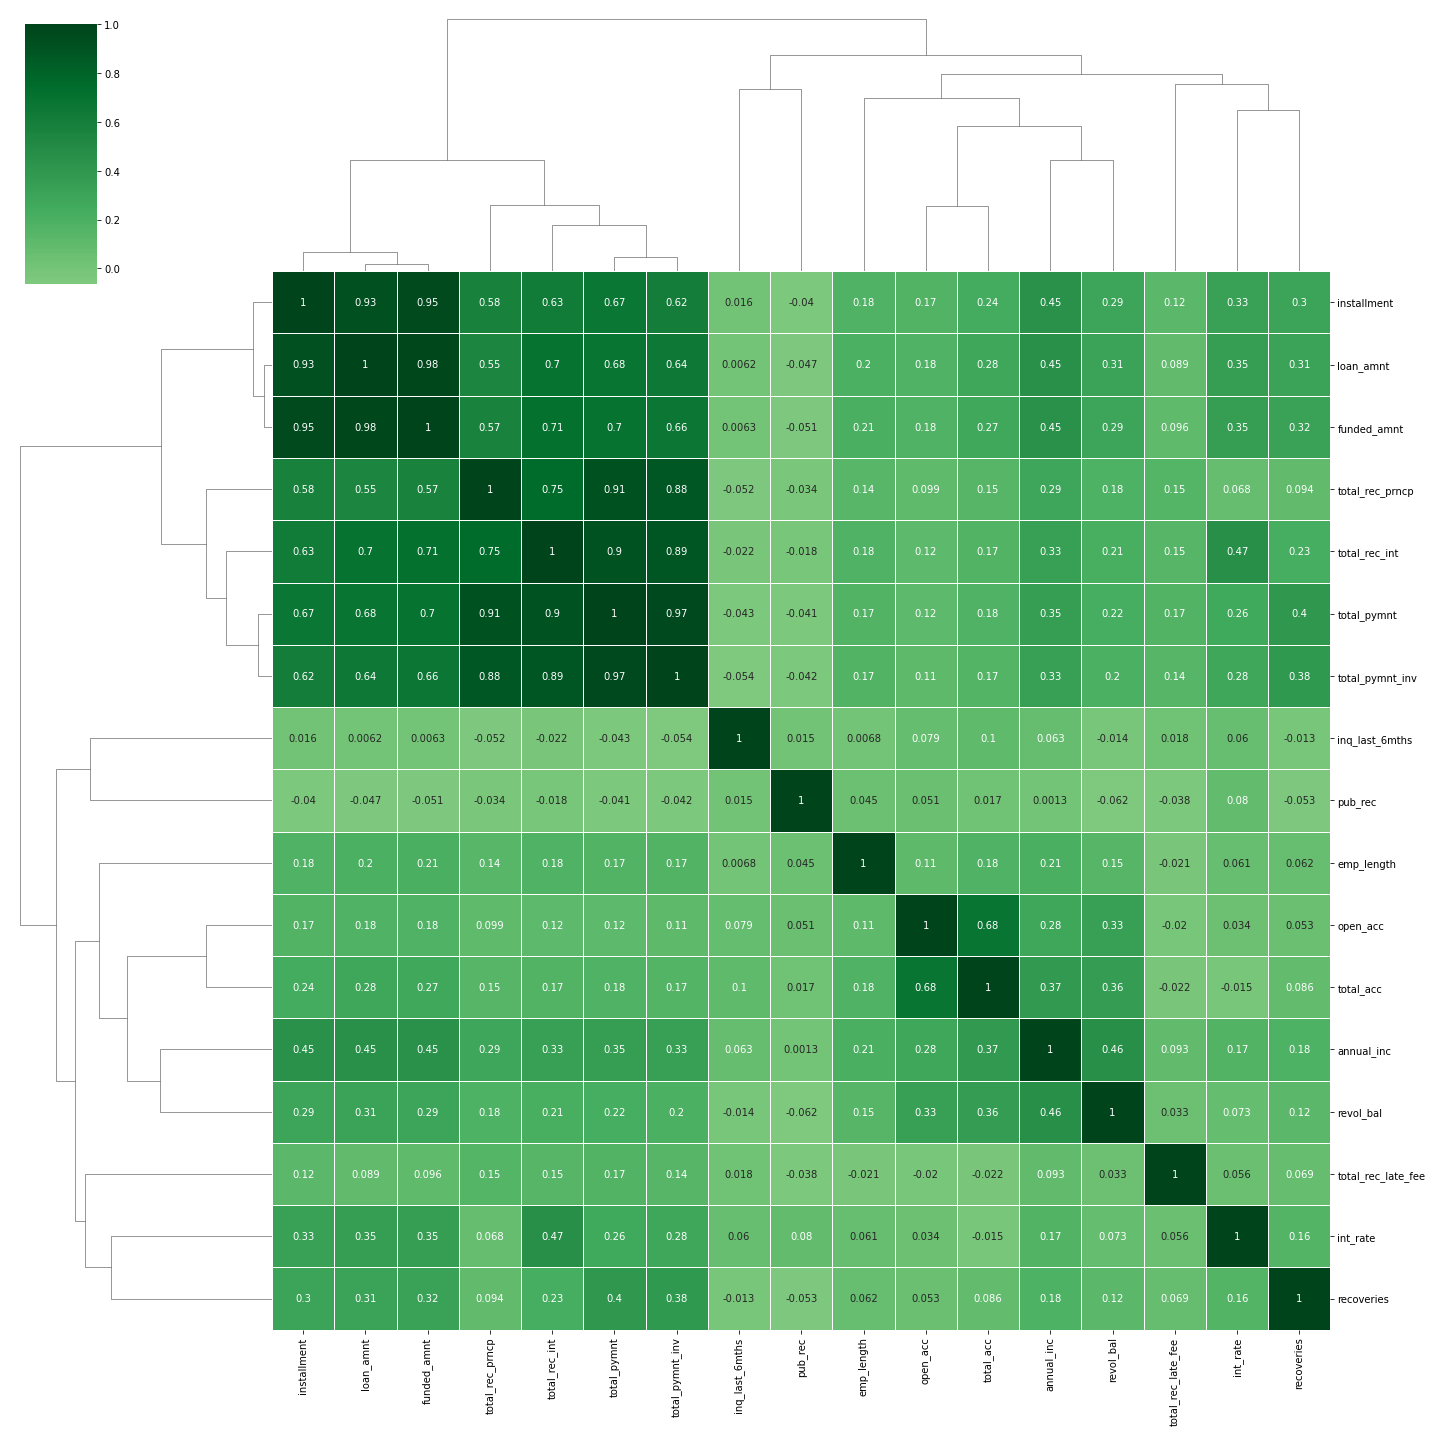

In [228]:
sns.clustermap(loan_df_corr_cleaned.corr(), center = 0, cmap = 'Greens', linewidths = 0.75, figsize = (20, 20), annot=True)
plt.show()

In [ ]:
data_dict.loc['last']